#### [詳解ディープラーニング　TensorFlow・Kerasによる時系列データ処理](https://book.mynavi.jp/ec/products/detail/id=72995)
　巣籠悠輔 著  
  
support site : [https://book.mynavi.jp/supportsite/detail/9784839962517.html](https://book.mynavi.jp/supportsite/detail/9784839962517.html)  
github : [yusugomori/deeplearning-tensorflow-keras](https://github.com/yusugomori/deeplearning-tensorflow-keras) 


### （３章　続き）

#### 多層パーセプトロン
XORゲートをパーセプトロンによって再現することを考える。  
パーセプトロンの入出力は次の通り。

$x_{1}$|$x_{2}$|y
-:-|-:-|-:-
0|0|0
0|1|1
1|0|1
1|1|0

これは線形分離不可能であり、一層パーセプトロンでは再現できない。  
例として、次のように分類を試みると失敗する。  

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([
    #Dense(input_dim=2, output_dim=1),
    Dense(units=1, input_dim=2), # keras v2.0へのアップデートに伴う変更
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X,Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.8427     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8205     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8049     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7924     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7822     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.7754     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.7688     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.7622     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.7578     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.7555     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.7520     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.7497     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.7468     
Epoch 14/200
4/4 [================

パーセプトロンの多層化によりXORゲートを実現することを考える。  
XORゲートの入出力表は次の通り。
  
$x_{1}$|$x_{2}$||$y$
-:-|-:-||-:-
0|0||0
0|1||1
1|0||1
1|1||0

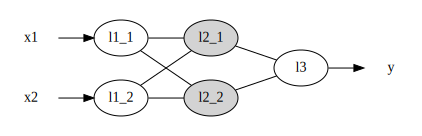

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node_attr['arrowhead']='none'
dot.graph_attr['rankdir']='LR'

with dot.subgraph(name='cluster_0', graph_attr={'style': 'invis'}) as c0:
    c0.node('x1','x1', shape='plaintext')
    c0.edge('x1', 'l1_1')
    c0.node('l2_1', 'l2_1', style='filled')
    c0.edge('l1_1', 'l2_1', arrowhead='none')
    
with dot.subgraph(name='cluster_1', graph_attr={'style': 'invis'}) as c1:
    c1.node('x2','x2', shape='plaintext')
    c1.edge('x2', 'l1_2')
    c1.node('l2_2', 'l2_2', style='filled')
    c1.edge('l1_2', 'l2_2', arrowhead='none')

dot.edge('l1_1','l2_2', arrowhead='none')
dot.edge('l1_2','l2_1', arrowhead='none')
dot.edge('l2_1','l3', arrowhead='none')
dot.edge('l2_2','l3', arrowhead='none')
dot.node('y','y', shape='plaintext')
dot.edge('l3','y')

dot.body.append('{rank=min; x1; x2;}')
dot


１層パーセプトロンに上記のような隠れ層（図中では灰色のノードが属する）を追加し、  
入力 $X=(x_{1}, x_{2})^{\mathrm{T}}$ に対して以下の式により出力 $y$ を返す。  
  
\begin{align*}
h_{1} &= f(w_{11}x_{1} +w_{12}x_{2} + b_{1}) \\
h_{2} &= f(w_{21}x_{1} +w_{22}x_{2} + b_{2}) \\
y &= f(v_{1}h_{1} + v_{2}h_{2} + c)
\end{align*}

ここで $f()$ はステップ関数、  
$V=(v_{1}, v_{2})^{\mathrm{T}}, \, c$ は隠れ層から出力層への重みベクトルおよびバイアスである。    
  
このとき、例えば以下のようなパラメータはXORゲートとして正しい出力を与える。  

\begin{align*}
W&=\left( \begin{array}{cc}
w_{11}& w_{12}\\
w_{21}& w_{22}
\end{array}
\right) = \left( \begin{array}{cc}
2& 2\\
-2& -2
\end{array} \right) \\
b&=\left( \begin{array}{c}
b_{1}\\
b_{2}
\end{array}
\right) = \left( \begin{array}{c}
-1\\
3
\end{array}
\right) \\
V&=\left( \begin{array}{c}
v_{1}\\
v_{2}
\end{array}
\right) = \left( \begin{array}{c}
2\\
2
\end{array}
\right) \\
c &= -3
\end{align*}

$x_{1}$ | $x_{2}$ | $h_{1}$ | $h_{2}$ | $v_{1}h_{1} + v_{2}h_{2}+c$ || $y$
-:-|-:-|-:-|-:-|-:-||-:-
0|0|-1|1|-3||-1
0|1|1|1|1||1
1|0|1|1|1||1
1|1|1|-1|-3||-1


#### モデル化

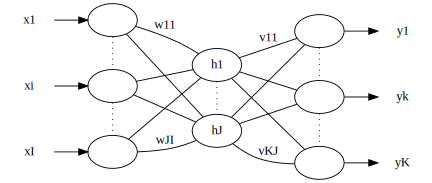

In [8]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="6,6"

with dot.subgraph(name='b_0_0') as c00:
    c00.node('x1', 'x1', shape='plaintext')
    c00.node('l11', '')
    c00.edge('x1', 'l11')
    c00.node('l21', '')
    c00.node('y1', 'y1', shape='plaintext')
    c00.edge('l21', 'y1')
with dot.subgraph(name='b_0_1') as c01:
    c01.node('xi', 'xi', shape='plaintext')
    c01.node('l1i', '')
    c01.edge('xi', 'l1i')
    c01.node('l2k', '')
    c01.node('yk', 'yk', shape='plaintext')
    c01.edge('l2k', 'yk')
with dot.subgraph(name='b_0_2') as c02:
    c02.node('xI', 'xI', shape='plaintext')
    c02.node('l1I', '')
    c02.edge('xI', 'l1I')
    c02.node('l2K', '')
    c02.node('yK', 'yK', shape='plaintext')
    c02.edge('l2K', 'yK')
with dot.subgraph(name='b_1_0') as c10:
    c10.node('h1', 'h1')
    c10.node('hJ', 'hJ')
    
    
dot.edge('l11', 'h1', arrowhead='none', label='w11')
dot.edge('l1i', 'h1', arrowhead='none')
dot.edge('l1I', 'h1', arrowhead='none')
dot.edge('l11', 'hJ', arrowhead='none')
dot.edge('l1i', 'hJ', arrowhead='none')
dot.edge('l1I', 'hJ', arrowhead='none', label='wJI')

dot.edge('h1', 'l21', arrowhead='none', label='v11')
dot.edge('h1', 'l2k', arrowhead='none')
dot.edge('h1', 'l2K', arrowhead='none')
dot.edge('hJ', 'l21', arrowhead='none')
dot.edge('hJ', 'l2k', arrowhead='none')
dot.edge('hJ', 'l2K', arrowhead='none', label='vKJ')
    
dot.edge('l11', 'l1i', style='dotted', arrowhead='none')
dot.edge('l1i', 'l1I', style='dotted', arrowhead='none')
dot.edge('h1', 'hJ', style='dotted', arrowhead='none')
dot.edge('l21', 'l2k', style='dotted', arrowhead='none')
dot.edge('l2k', 'l2K', style='dotted', arrowhead='none')

dot.body.append('{rank=min; x1; xi; xI;}')
dot.body.append('{rank=same; l11; l1i; l1I;}')
dot.body.append('{rank=same; h1; hJ;}')
dot.body.append('{rank=same; l21; l2k; l2K;}')
dot.body.append('{rank=max; y1; yk; yK;}')
    
dot

入力 $X = (x_{1}, \dots, x_{I})^{\mathrm{T}}$ を受ける３層パーセプトロンについて考える。  
　（層の数え方は書籍の記述に従っている）  

隠れ層における出力 $H = (h_{1}, \dots, h_{J})^{\mathrm{T}}$ は、  
重み $W$ 、バイアス $B = (b_{1}, \dots, b_{J})^{\mathrm{T}}$ 、活性化関数 $f$ に対し　　

\begin{align*}
H = f(WX + B)
\end{align*}

と書ける。同様にして、出力層における出力 $Y = (y_{1}, \dots, y_{K})^{\mathrm{T}})$ は、  
重み $V$ 、バイアス $C = (c_{1}, \dots, c_{K})$ 、活性化関数 $g$ に対し    

\begin{align*}
Y = g(WH + C)
\end{align*}

と書くことができる。  

---
勾配降下法を適用するため、各パラメータに対する勾配を求める。

データセットのうちn番目のデータによって求めた誤差を $E_{n}$ とする。
各層の活性化前の値をそれぞれ

\begin{align*}
p := WX + B \\
q := VH + C
\end{align*}

とおく。  
$W = (w_{1}, \dots, w_{J})^{\mathrm{T}}$ および $V = (v_{1}, \dots, v_{K})^{\mathrm{T}}$ に対して  

\begin{align*}
\begin{cases}
\frac{\partial E_{n}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}X \\
\frac{\partial E_{n}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}
\end{cases} \\
 \\
\begin{cases}
\frac{\partial E_{n}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}H \\
\frac{\partial E_{n}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}
\end{cases}
\end{align*}

となるから、$\frac{\partial E_{n}}{\partial p_{j}}$ および $\frac{\partial E_{n}}{\partial q_{k}}$ がわかれば十分である。

さて、先ほどの多クラスロジスティック回帰と同様に  
隠れ層->出力層の伝播にソフトマックス関数を使うならば、  

\begin{align*}
\frac{\partial E_{n}}{\partial q_{k}} = -(t_{k} - y_{k})
\end{align*}

が得られる。
$ \frac{\partial E_{n}}{\partial p_{j}} $ について偏微分の連鎖率を用いて、

\begin{align*}
\frac{\partial E_{n}}{\partial p_{j}} &= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial p_{j}} \\
&= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}} \left( f^{\prime}(p_{j})v_{kj} \right)
\end{align*}

となる。

---
>以下の節は、  
[誤差逆伝播法のノート](https://qiita.com/Ugo-Nama/items/04814a13c9ea84978a4c)、および  
Michael Nielsen著 [「ニューラルネットワークと深層学習」　Chapter 2](http://nnadl-ja.github.io/nnadl_site_ja/chap2.html)を参照した。  
表記は一部を除き文献に合わせた。

いま、L層パーセプトロンについて一般化し、  
第$l$層が前の層から入力 $a^{l-1}$ を受けて出力 $a^{l}$ を次の層に送るとする。  
  
第$l-1$層$k$番目のニューロンから第$l$層$j$番目のニューロンへの接続の重みを $w^{l}_{jk}$ と表記し、  
第$l$層$j$番目のニューロンのバイアスを $b^{l}_{j}$、活性を $a^{l}_{j}$ とする。  
活性化関数が $f$ であるとき、

\begin{align*}
a^{l}_{j} = f \left( \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j} \right)
\end{align*}

となる。この式を行列で書き直すため、各層に対し  

\begin{align*}
&\text{重み行列} & w^{l} | w^{l}(j,k) = w^{l}_{jk} \\
&\text{バイアスベクトル} &　b^{l} = (b^{l}_{1}, \dots, b^{l}_{j}, \dots) \\
&\text{活性ベクトル} & a^{l} = (a^{l}_{1}, \dots, a^{l}_{j}, \dots)
&\end{align*}

と定義すると、次のように書き直すことができる。

\begin{align*}
a^{l} = f(w^{l}a^{l-1} + b^{l})
\end{align*}

また、活性化関数への代入値を重み付き入力と呼び、

\begin{align*}
z^{l} = w^{l}a^{l-1} + b^{l} = \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}
\end{align*}

とする。

誤差関数の値をCとする。  
（例えばj番目の入力に対する正解が $t_{j}$ 、二乗誤差関数を用いるとき  
$C = \frac{1}{2}||t-a^{L}||^{2} = \frac{1}{2}\sum_{j}(t_{j} - a^{L}_{j})^{2}$ である）  
  
第l層j番目のニューロンの重み付き入力に小さな変更 $ \Delta z^{l}_{j}$ を加えると  
ニューロンの出力は $f(z^{l}_{j} + \Delta z^{l}_{j})$ となり、  
全体のコスト関数の値は $\frac{\partial C}{\partial z^{l}_{j}} \Delta z^{l}_{j}$ だけ変化する。  
 $ \Delta z^{l}_{j}$ を適切に選んで誤差関数の値を改善することを考える。  
  
ここで、第l層j番目のニューロンの誤差 $\delta^{l}_{j}$ を次のように定義する。

\begin{align*}
\delta^{l}_{j} := \frac{\partial C}{\partial z^{l}_{j}}
\end{align*}

出力層での誤差 $\delta^{L}$ の各要素は次の通り。

\begin{align*}
\delta^{L}_{j} = \frac{\partial C}{\partial a^{L}_{j}}f^{\prime}(z^{L}_{j})
\end{align*}

これを行列として表記するとき、アダマール積を $\odot$ で表して

\begin{align*}
\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})
\end{align*}

ただし $\nabla_{a} C$ は偏微分 $\frac{\partial L}{\partial a^{L}_{j}}$ を並べたベクトルである。  
  
誤差 $\delta^{l}$ と $\delta^{l+1}$ の関係は次のように表せる。  

\begin{align*}
\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})
\end{align*}

これらの式を逐次適用し $\delta^{L-1}, \delta^{L-2}, \dots$ と求めることで、任意の層lでの誤差 $\delta^{l}$ を求めることができる。  
（本式が誤差を逆方向に伝播させているように見えることが、誤差逆伝播法の名前の由来とされている）  
  
バイアスについては

\begin{align*}
\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}
\end{align*}

すなわち

\begin{align*}
\frac{\partial C}{\partial b} = \delta
\end{align*}

と書くことができる。
  
重みについては

\begin{align*}
\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}
\end{align*}

であり、

\begin{align*}
\frac{\partial C}{\partial w} = a_{in} \delta_{out}
\end{align*}

と書き直すことができる。  

以上を用いて、逆伝播のアルゴリズムは次のようになる。
>1.input  
　入力層に対応する活性 $a^{1}$ をセットする  
>2.Feedforward  
　各 $l=2,3,\dots,L$ に対し、$z^{l} = w^{l}a^{l-1} + b^{l}$ と $a^{l} = f(z^{l})$ を計算する  
>3.Output error $\delta^{L}$  
　誤差ベクトル $\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})$ を計算する  
>4.Backpropagate the error  
　各 $l=L-1, L-2, \dots, 2$ に対し、$\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})$ を計算する  
>5.output  
　誤差関数の勾配は $\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}$ と $\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}$ で得られる  

このアルゴリズムをミニバッチ学習に対する勾配降下法の適用する手順は次の通り。
>1.Input a set of training examples  
  
>2.For each training example x:   
　対応する活性 $a^{x,l}$ をセットし、以下のステップを行う  
　・Feedforward  
　　　$l=2,3,\dots,L$ に対し、$z^{x,l} = w^{l}a^{x,l-1}+b^{l}$ と $ a^{x,l}=f(z^{x,l})$ を計算する  
　・Output error \delta^{x,L}  
　　　誤差ベクトル $\delta^{x,L} = \nabla_{a}C_{x} \odot f^{\prime}(z^{x,L})$ を計算する  
　・Backpropagate the error  
　　　$l=L-1, L-2, \dots, 2$ に対し、$\delta^{x,l} = ((w^{l+1})^{\mathrm{T}} \delta^{x,l+1}) \odot f^{\prime}(z^{x,l})$ を計算する  
>3.Gradient descent  
　$l=L, L-1, \dots, 2$ に対し、重みとバイアスを  
　$w^{l} \rightarrow w^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l} (a^{x,l-1})^{\mathrm{T}}$   
　$b^{l} \rightarrow b^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l}$  
　で更新する  

---
#### TensorFlowによる実装

In [6]:
import numpy as np
import tensorflow as tf

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

x = tf.placeholder(tf.float32, shape=[None,2])
t = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.truncated_normal([2,2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x,W)+b)
V = tf.Variable(tf.truncated_normal([2,1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h,V)+c)

cross_entropy = -tf.reduce_sum(t*tf.log(y) + (1-t)*tf.log(1-y))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)),t)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 ==0:
        print('epoch:{}'.format(epoch))
        
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('\nclassified: \n {} \n'.format(classified))
print('output probability: {}'.format(prob))

epoch:0
epoch:1000
epoch:2000
epoch:3000

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]] 

output probability: [[ 0.00645459]
 [ 0.99288309]
 [ 0.99286485]
 [ 0.01096012]]


---
WIP

#### Kerasによる実装

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

model.fit(X, Y, epochs=4000, batch_size=4)

classes = model.predict_classes(X, batch_size=4)
prob = model.predict_proba(X, batch_size=4)

print('\nclassified: \n {} \n'.format(Y==classes))
print('output probability: {}'.format(prob))

Epoch 1/4000
4/4 [==============================] - 0s - loss: 0.8219
Epoch 2/4000
4/4 [==============================] - 0s - loss: 0.8119
Epoch 3/4000
4/4 [==============================] - 0s - loss: 0.8027
Epoch 4/4000
4/4 [==============================] - 0s - loss: 0.7941
Epoch 5/4000
4/4 [==============================] - 0s - loss: 0.7862
Epoch 6/4000
4/4 [==============================] - 0s - loss: 0.7789
Epoch 7/4000
4/4 [==============================] - 0s - loss: 0.7721
Epoch 8/4000
4/4 [==============================] - 0s - loss: 0.7659
Epoch 9/4000
4/4 [==============================] - 0s - loss: 0.7601
Epoch 10/4000
4/4 [==============================] - 0s - loss: 0.7548
Epoch 11/4000
4/4 [==============================] - 0s - loss: 0.7499
Epoch 12/4000
4/4 [==============================] - 0s - loss: 0.7454
Epoch 13/4000
4/4 [==============================] - 0s - loss: 0.7412
Epoch 14/4000
4/4 [==============================] - 0s - loss: 0.7374
Epoch 15/4000
4

4/4 [==============================] - 0s - loss: 0.6926
Epoch 231/4000
4/4 [==============================] - 0s - loss: 0.6926
Epoch 232/4000
4/4 [==============================] - 0s - loss: 0.6926
Epoch 233/4000
4/4 [==============================] - 0s - loss: 0.6926
Epoch 234/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 235/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 236/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 237/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 238/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 239/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 240/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 241/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 242/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 243/4000
4/4 [==============================] - 0s - loss: 0.6925
Epoch 2

4/4 [==============================] - 0s - loss: 0.6921
Epoch 345/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 346/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 347/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 348/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 349/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 350/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 351/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 352/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 353/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 354/4000
4/4 [==============================] - 0s - loss: 0.6921
Epoch 355/4000
4/4 [==============================] - 0s - loss: 0.6920
Epoch 356/4000
4/4 [==============================] - 0s - loss: 0.6920
Epoch 357/4000
4/4 [==============================] - 0s - loss: 0.6920
Epoch 3

4/4 [==============================] - 0s - loss: 0.6916
Epoch 459/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 460/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 461/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 462/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 463/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 464/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 465/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 466/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 467/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 468/4000
4/4 [==============================] - 0s - loss: 0.6916
Epoch 469/4000
4/4 [==============================] - 0s - loss: 0.6915
Epoch 470/4000
4/4 [==============================] - 0s - loss: 0.6915
Epoch 471/4000
4/4 [==============================] - 0s - loss: 0.6915
Epoch 4

4/4 [==============================] - 0s - loss: 0.6910
Epoch 573/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 574/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 575/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 576/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 577/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 578/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 579/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 580/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 581/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 582/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 583/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 584/4000
4/4 [==============================] - 0s - loss: 0.6910
Epoch 585/4000
4/4 [==============================] - 0s - loss: 0.6909
Epoch 5

Epoch 686/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 687/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 688/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 689/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 690/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 691/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 692/4000
4/4 [==============================] - 0s - loss: 0.6903
Epoch 693/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 694/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 695/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 696/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 697/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 698/4000
4/4 [==============================] - 0s - loss: 0.6902
Epoch 699/4000
4/4 [==============================] - 0s - loss:

4/4 [==============================] - 0s - loss: 0.6881
Epoch 914/4000
4/4 [==============================] - 0s - loss: 0.6881
Epoch 915/4000
4/4 [==============================] - 0s - loss: 0.6881
Epoch 916/4000
4/4 [==============================] - 0s - loss: 0.6881
Epoch 917/4000
4/4 [==============================] - 0s - loss: 0.6881
Epoch 918/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 919/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 920/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 921/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 922/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 923/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 924/4000
4/4 [==============================] - 0s - loss: 0.6880
Epoch 925/4000
4/4 [==============================] - 0s - loss: 0.6879
Epoch 926/4000
4/4 [==============================] - 0s - loss: 0.6879
Epoch 9

4/4 [==============================] - 0s - loss: 0.6843
Epoch 1139/4000
4/4 [==============================] - 0s - loss: 0.6842
Epoch 1140/4000
4/4 [==============================] - 0s - loss: 0.6842
Epoch 1141/4000
4/4 [==============================] - 0s - loss: 0.6842
Epoch 1142/4000
4/4 [==============================] - 0s - loss: 0.6842
Epoch 1143/4000
4/4 [==============================] - 0s - loss: 0.6841
Epoch 1144/4000
4/4 [==============================] - 0s - loss: 0.6841
Epoch 1145/4000
4/4 [==============================] - 0s - loss: 0.6841
Epoch 1146/4000
4/4 [==============================] - 0s - loss: 0.6841
Epoch 1147/4000
4/4 [==============================] - 0s - loss: 0.6841
Epoch 1148/4000
4/4 [==============================] - 0s - loss: 0.6840
Epoch 1149/4000
4/4 [==============================] - 0s - loss: 0.6840
Epoch 1150/4000
4/4 [==============================] - 0s - loss: 0.6840
Epoch 1151/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.6777
Epoch 1363/4000
4/4 [==============================] - 0s - loss: 0.6777
Epoch 1364/4000
4/4 [==============================] - 0s - loss: 0.6777
Epoch 1365/4000
4/4 [==============================] - 0s - loss: 0.6776
Epoch 1366/4000
4/4 [==============================] - 0s - loss: 0.6776
Epoch 1367/4000
4/4 [==============================] - 0s - loss: 0.6775
Epoch 1368/4000
4/4 [==============================] - 0s - loss: 0.6775
Epoch 1369/4000
4/4 [==============================] - 0s - loss: 0.6775
Epoch 1370/4000
4/4 [==============================] - 0s - loss: 0.6774
Epoch 1371/4000
4/4 [==============================] - 0s - loss: 0.6774
Epoch 1372/4000
4/4 [==============================] - 0s - loss: 0.6774
Epoch 1373/4000
4/4 [==============================] - 0s - loss: 0.6773
Epoch 1374/4000
4/4 [==============================] - 0s - loss: 0.6773
Epoch 1375/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.6674
Epoch 1587/4000
4/4 [==============================] - 0s - loss: 0.6673
Epoch 1588/4000
4/4 [==============================] - 0s - loss: 0.6673
Epoch 1589/4000
4/4 [==============================] - 0s - loss: 0.6672
Epoch 1590/4000
4/4 [==============================] - 0s - loss: 0.6672
Epoch 1591/4000
4/4 [==============================] - 0s - loss: 0.6671
Epoch 1592/4000
4/4 [==============================] - 0s - loss: 0.6671
Epoch 1593/4000
4/4 [==============================] - 0s - loss: 0.6670
Epoch 1594/4000
4/4 [==============================] - 0s - loss: 0.6669
Epoch 1595/4000
4/4 [==============================] - 0s - loss: 0.6669
Epoch 1596/4000
4/4 [==============================] - 0s - loss: 0.6668

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.



Epoch 1908/4000
4/4 [==============================] - 0s - loss: 0.6439
Epoch 1909/4000
4/4 [==============================] - 0s - loss: 0.6439
Epoch 1910/4000
4/4 [==============================] - 0s - loss: 0.6438
Epoch 1911/4000
4/4 [==============================] - 0s - loss: 0.6437
Epoch 1912/4000
4/4 [==============================] - 0s - loss: 0.6436
Epoch 1913/4000
4/4 [==============================] - 0s - loss: 0.6435
Epoch 1914/4000
4/4 [==============================] - 0s - loss: 0.6434
Epoch 1915/4000
4/4 [==============================] - 0s - loss: 0.6433
Epoch 1916/4000
4/4 [==============================] - 0s - loss: 0.6432
Epoch 1917/4000
4/4 [==============================] - 0s - loss: 0.6431
Epoch 1918/4000
4/4 [==============================] - 0s - loss: 0.6430
Epoch 1919/4000
4/4 [==============================] - 0s - loss: 0.6429
Epoch 1920/4000
4/4 [==============================] - 0s - loss: 0.6429
Epoch 1921/4000
4/4 [=============================

4/4 [==============================] - 0s - loss: 0.6332
Epoch 2021/4000
4/4 [==============================] - 0s - loss: 0.6331
Epoch 2022/4000
4/4 [==============================] - 0s - loss: 0.6330
Epoch 2023/4000
4/4 [==============================] - 0s - loss: 0.6329
Epoch 2024/4000
4/4 [==============================] - 0s - loss: 0.6328
Epoch 2025/4000
4/4 [==============================] - 0s - loss: 0.6327
Epoch 2026/4000
4/4 [==============================] - 0s - loss: 0.6326
Epoch 2027/4000
4/4 [==============================] - 0s - loss: 0.6325
Epoch 2028/4000
4/4 [==============================] - 0s - loss: 0.6324
Epoch 2029/4000
4/4 [==============================] - 0s - loss: 0.6323
Epoch 2030/4000
4/4 [==============================] - 0s - loss: 0.6322
Epoch 2031/4000
4/4 [==============================] - 0s - loss: 0.6321
Epoch 2032/4000
4/4 [==============================] - 0s - loss: 0.6320
Epoch 2033/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.6083
Epoch 2245/4000
4/4 [==============================] - 0s - loss: 0.6082
Epoch 2246/4000
4/4 [==============================] - 0s - loss: 0.6081
Epoch 2247/4000
4/4 [==============================] - 0s - loss: 0.6079
Epoch 2248/4000
4/4 [==============================] - 0s - loss: 0.6078
Epoch 2249/4000
4/4 [==============================] - 0s - loss: 0.6077
Epoch 2250/4000
4/4 [==============================] - 0s - loss: 0.6076
Epoch 2251/4000
4/4 [==============================] - 0s - loss: 0.6075
Epoch 2252/4000
4/4 [==============================] - 0s - loss: 0.6073
Epoch 2253/4000
4/4 [==============================] - 0s - loss: 0.6072
Epoch 2254/4000
4/4 [==============================] - 0s - loss: 0.6071
Epoch 2255/4000
4/4 [==============================] - 0s - loss: 0.6070
Epoch 2256/4000
4/4 [==============================] - 0s - loss: 0.6069
Epoch 2257/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.5808
Epoch 2469/4000
4/4 [==============================] - 0s - loss: 0.5807
Epoch 2470/4000
4/4 [==============================] - 0s - loss: 0.5805
Epoch 2471/4000
4/4 [==============================] - 0s - loss: 0.5804
Epoch 2472/4000
4/4 [==============================] - 0s - loss: 0.5803
Epoch 2473/4000
4/4 [==============================] - 0s - loss: 0.5802
Epoch 2474/4000
4/4 [==============================] - 0s - loss: 0.5800
Epoch 2475/4000
4/4 [==============================] - 0s - loss: 0.5799
Epoch 2476/4000
4/4 [==============================] - 0s - loss: 0.5798
Epoch 2477/4000
4/4 [==============================] - 0s - loss: 0.5797
Epoch 2478/4000
4/4 [==============================] - 0s - loss: 0.5795
Epoch 2479/4000
4/4 [==============================] - 0s - loss: 0.5794
Epoch 2480/4000
4/4 [==============================] - 0s - loss: 0.5793
Epoch 2481/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.5529
Epoch 2693/4000
4/4 [==============================] - 0s - loss: 0.5528
Epoch 2694/4000
4/4 [==============================] - 0s - loss: 0.5527
Epoch 2695/4000
4/4 [==============================] - 0s - loss: 0.5526
Epoch 2696/4000
4/4 [==============================] - 0s - loss: 0.5524
Epoch 2697/4000
4/4 [==============================] - 0s - loss: 0.5523
Epoch 2698/4000
4/4 [==============================] - 0s - loss: 0.5522
Epoch 2699/4000
4/4 [==============================] - 0s - loss: 0.5521
Epoch 2700/4000
4/4 [==============================] - 0s - loss: 0.5519
Epoch 2701/4000
4/4 [==============================] - 0s - loss: 0.5518
Epoch 2702/4000
4/4 [==============================] - 0s - loss: 0.5517
Epoch 2703/4000
4/4 [==============================] - 0s - loss: 0.5516
Epoch 2704/4000
4/4 [==============================] - 0s - loss: 0.5515
Epoch 2705/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.5260
Epoch 2917/4000
4/4 [==============================] - 0s - loss: 0.5259
Epoch 2918/4000
4/4 [==============================] - 0s - loss: 0.5258
Epoch 2919/4000
4/4 [==============================] - 0s - loss: 0.5257
Epoch 2920/4000
4/4 [==============================] - 0s - loss: 0.5255
Epoch 2921/4000
4/4 [==============================] - 0s - loss: 0.5254
Epoch 2922/4000
4/4 [==============================] - 0s - loss: 0.5253
Epoch 2923/4000
4/4 [==============================] - 0s - loss: 0.5252
Epoch 2924/4000
4/4 [==============================] - 0s - loss: 0.5251
Epoch 2925/4000
4/4 [==============================] - 0s - loss: 0.5250
Epoch 2926/4000
4/4 [==============================] - 0s - loss: 0.5248
Epoch 2927/4000
4/4 [==============================] - 0s - loss: 0.5247
Epoch 2928/4000
4/4 [==============================] - 0s - loss: 0.5246
Epoch 2929/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.5007
Epoch 3141/4000
4/4 [==============================] - 0s - loss: 0.5006
Epoch 3142/4000
4/4 [==============================] - 0s - loss: 0.5005
Epoch 3143/4000
4/4 [==============================] - 0s - loss: 0.5004
Epoch 3144/4000
4/4 [==============================] - 0s - loss: 0.5003
Epoch 3145/4000
4/4 [==============================] - 0s - loss: 0.5002
Epoch 3146/4000
4/4 [==============================] - 0s - loss: 0.5000
Epoch 3147/4000
4/4 [==============================] - 0s - loss: 0.4999
Epoch 3148/4000
4/4 [==============================] - 0s - loss: 0.4998
Epoch 3149/4000
4/4 [==============================] - 0s - loss: 0.4997
Epoch 3150/4000
4/4 [==============================] - 0s - loss: 0.4996
Epoch 3151/4000
4/4 [==============================] - 0s - loss: 0.4995
Epoch 3152/4000
4/4 [==============================] - 0s - loss: 0.4994
Epoch 3153/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.4777
Epoch 3365/4000
4/4 [==============================] - 0s - loss: 0.4776
Epoch 3366/4000
4/4 [==============================] - 0s - loss: 0.4775
Epoch 3367/4000
4/4 [==============================] - 0s - loss: 0.4774
Epoch 3368/4000
4/4 [==============================] - 0s - loss: 0.4773
Epoch 3369/4000
4/4 [==============================] - 0s - loss: 0.4772
Epoch 3370/4000
4/4 [==============================] - 0s - loss: 0.4771
Epoch 3371/4000
4/4 [==============================] - 0s - loss: 0.4770
Epoch 3372/4000
4/4 [==============================] - 0s - loss: 0.4769
Epoch 3373/4000
4/4 [==============================] - 0s - loss: 0.4768
Epoch 3374/4000
4/4 [==============================] - 0s - loss: 0.4767
Epoch 3375/4000
4/4 [==============================] - 0s - loss: 0.4766
Epoch 3376/4000
4/4 [==============================] - 0s - loss: 0.4765
Epoch 3377/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.4576
Epoch 3589/4000
4/4 [==============================] - 0s - loss: 0.4575
Epoch 3590/4000
4/4 [==============================] - 0s - loss: 0.4575
Epoch 3591/4000
4/4 [==============================] - 0s - loss: 0.4574
Epoch 3592/4000
4/4 [==============================] - 0s - loss: 0.4573
Epoch 3593/4000
4/4 [==============================] - 0s - loss: 0.4572
Epoch 3594/4000
4/4 [==============================] - 0s - loss: 0.4571
Epoch 3595/4000
4/4 [==============================] - 0s - loss: 0.4571
Epoch 3596/4000
4/4 [==============================] - 0s - loss: 0.4570
Epoch 3597/4000
4/4 [==============================] - 0s - loss: 0.4569
Epoch 3598/4000
4/4 [==============================] - 0s - loss: 0.4568
Epoch 3599/4000
4/4 [==============================] - 0s - loss: 0.4567
Epoch 3600/4000
4/4 [==============================] - 0s - loss: 0.4566
Epoch 3601/4000
4/4 [==============================] - 0s - loss: 0

4/4 [==============================] - 0s - loss: 0.4408
Epoch 3813/4000
4/4 [==============================] - 0s - loss: 0.4407
Epoch 3814/4000
4/4 [==============================] - 0s - loss: 0.4407
Epoch 3815/4000
4/4 [==============================] - 0s - loss: 0.4406
Epoch 3816/4000
4/4 [==============================] - 0s - loss: 0.4405
Epoch 3817/4000
4/4 [==============================] - 0s - loss: 0.4405
Epoch 3818/4000
4/4 [==============================] - 0s - loss: 0.4404
Epoch 3819/4000
4/4 [==============================] - 0s - loss: 0.4403
Epoch 3820/4000
4/4 [==============================] - 0s - loss: 0.4403
Epoch 3821/4000
4/4 [==============================] - 0s - loss: 0.4402
Epoch 3822/4000
4/4 [==============================] - 0s - loss: 0.4401
Epoch 3823/4000
4/4 [==============================] - 0s - loss: 0.4401
Epoch 3824/4000
4/4 [==============================] - 0s - loss: 0.4400
Epoch 3825/4000
4/4 [==============================] - 0s - loss: 0

上記コードだと学習失敗が多いので改良を試みる  
lossが下がりきっていないように見えるので、学習不足と考えてepochsを増やす  

In [21]:
import numpy as np
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

inputs = Input(shape=(2,))

x = Dense(2, activation='sigmoid')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=SGD(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y,
          epochs=6000,
          batch_size=4)

proba = model.predict(X, batch_size=4)
classes = list(map(lambda x: [1] if x-0.5>=0 else [0], proba))
print('\nclassified: \n {} \n'.format(Y==classes))
print('output probability:\n {}'.format(proba))

Epoch 1/6000
4/4 [==============================] - 0s - loss: 0.6985 - acc: 0.7500
Epoch 2/6000
4/4 [==============================] - 0s - loss: 0.6981 - acc: 0.7500
Epoch 3/6000
4/4 [==============================] - 0s - loss: 0.6978 - acc: 0.7500
Epoch 4/6000
4/4 [==============================] - 0s - loss: 0.6975 - acc: 0.7500
Epoch 5/6000
4/4 [==============================] - 0s - loss: 0.6973 - acc: 0.7500
Epoch 6/6000
4/4 [==============================] - 0s - loss: 0.6970 - acc: 0.7500
Epoch 7/6000
4/4 [==============================] - 0s - loss: 0.6968 - acc: 0.7500
Epoch 8/6000
4/4 [==============================] - 0s - loss: 0.6966 - acc: 0.7500
Epoch 9/6000
4/4 [==============================] - 0s - loss: 0.6964 - acc: 0.7500
Epoch 10/6000
4/4 [==============================] - 0s - loss: 0.6962 - acc: 0.7500
Epoch 11/6000
4/4 [==============================] - 0s - loss: 0.6960 - acc: 0.7500
Epoch 12/6000
4/4 [==============================] - 0s - loss: 0.6959 - a

4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 98/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 99/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 100/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 101/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 102/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 103/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 104/6000
4/4 [==============================] - 0s - loss: 0.6933 - acc: 0.5000
Epoch 105/6000
4/4 [==============================] - 0s - loss: 0.6932 - acc: 0.5000
Epoch 106/6000
4/4 [==============================] - 0s - loss: 0.6932 - acc: 0.5000
Epoch 107/6000
4/4 [==============================] - 0s - loss: 0.6932 - acc: 0.5000
Epoch 108/6000
4/4 [==============================] - 0s - loss: 0.6932

4/4 [==============================] - 0s - loss: 0.6923 - acc: 0.5000
Epoch 193/6000
4/4 [==============================] - 0s - loss: 0.6923 - acc: 0.5000
Epoch 194/6000
4/4 [==============================] - 0s - loss: 0.6923 - acc: 0.5000
Epoch 195/6000
4/4 [==============================] - 0s - loss: 0.6923 - acc: 0.5000
Epoch 196/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 197/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 198/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 199/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 200/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 201/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 202/6000
4/4 [==============================] - 0s - loss: 0.6922 - acc: 0.5000
Epoch 203/6000
4/4 [==============================] - 0s - loss: 0.69

4/4 [==============================] - 0s - loss: 0.6912 - acc: 0.5000
Epoch 288/6000
4/4 [==============================] - 0s - loss: 0.6912 - acc: 0.5000
Epoch 289/6000
4/4 [==============================] - 0s - loss: 0.6912 - acc: 0.5000
Epoch 290/6000
4/4 [==============================] - 0s - loss: 0.6912 - acc: 0.5000
Epoch 291/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 292/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 293/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 294/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 295/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 296/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 297/6000
4/4 [==============================] - 0s - loss: 0.6911 - acc: 0.5000
Epoch 298/6000
4/4 [==============================] - 0s - loss: 0.69

4/4 [==============================] - 0s - loss: 0.6900 - acc: 0.5000
Epoch 383/6000
4/4 [==============================] - 0s - loss: 0.6900 - acc: 0.5000
Epoch 384/6000
4/4 [==============================] - 0s - loss: 0.6900 - acc: 0.5000
Epoch 385/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 386/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 387/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 388/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 389/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 390/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 391/6000
4/4 [==============================] - 0s - loss: 0.6899 - acc: 0.5000
Epoch 392/6000
4/4 [==============================] - 0s - loss: 0.6898 - acc: 0.5000
Epoch 393/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6886 - acc: 0.5000
Epoch 478/6000
4/4 [==============================] - 0s - loss: 0.6886 - acc: 0.5000
Epoch 479/6000
4/4 [==============================] - 0s - loss: 0.6886 - acc: 0.5000
Epoch 480/6000
4/4 [==============================] - 0s - loss: 0.6886 - acc: 0.5000
Epoch 481/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 482/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 483/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 484/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 485/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 486/6000
4/4 [==============================] - 0s - loss: 0.6885 - acc: 0.5000
Epoch 487/6000
4/4 [==============================] - 0s - loss: 0.6884 - acc: 0.5000
Epoch 488/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6870 - acc: 0.5000
Epoch 573/6000
4/4 [==============================] - 0s - loss: 0.6870 - acc: 0.5000
Epoch 574/6000
4/4 [==============================] - 0s - loss: 0.6870 - acc: 0.5000
Epoch 575/6000
4/4 [==============================] - 0s - loss: 0.6870 - acc: 0.5000
Epoch 576/6000
4/4 [==============================] - 0s - loss: 0.6869 - acc: 0.5000
Epoch 577/6000
4/4 [==============================] - 0s - loss: 0.6869 - acc: 0.5000
Epoch 578/6000
4/4 [==============================] - 0s - loss: 0.6869 - acc: 0.5000
Epoch 579/6000
4/4 [==============================] - 0s - loss: 0.6869 - acc: 0.5000
Epoch 580/6000
4/4 [==============================] - 0s - loss: 0.6869 - acc: 0.5000
Epoch 581/6000
4/4 [==============================] - 0s - loss: 0.6868 - acc: 0.5000
Epoch 582/6000
4/4 [==============================] - 0s - loss: 0.6868 - acc: 0.5000
Epoch 583/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6851 - acc: 0.5000
Epoch 668/6000
4/4 [==============================] - 0s - loss: 0.6851 - acc: 0.5000
Epoch 669/6000
4/4 [==============================] - 0s - loss: 0.6851 - acc: 0.7500
Epoch 670/6000
4/4 [==============================] - 0s - loss: 0.6851 - acc: 0.7500
Epoch 671/6000
4/4 [==============================] - 0s - loss: 0.6850 - acc: 0.7500
Epoch 672/6000
4/4 [==============================] - 0s - loss: 0.6850 - acc: 0.7500
Epoch 673/6000
4/4 [==============================] - 0s - loss: 0.6850 - acc: 0.7500
Epoch 674/6000
4/4 [==============================] - 0s - loss: 0.6850 - acc: 0.7500
Epoch 675/6000
4/4 [==============================] - 0s - loss: 0.6850 - acc: 0.7500
Epoch 676/6000
4/4 [==============================] - 0s - loss: 0.6849 - acc: 0.7500
Epoch 677/6000
4/4 [==============================] - 0s - loss: 0.6849 - acc: 0.7500
Epoch 678/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6829 - acc: 0.7500
Epoch 763/6000
4/4 [==============================] - 0s - loss: 0.6829 - acc: 0.7500
Epoch 764/6000
4/4 [==============================] - 0s - loss: 0.6829 - acc: 0.7500
Epoch 765/6000
4/4 [==============================] - 0s - loss: 0.6829 - acc: 0.7500
Epoch 766/6000
4/4 [==============================] - 0s - loss: 0.6828 - acc: 0.7500
Epoch 767/6000
4/4 [==============================] - 0s - loss: 0.6828 - acc: 0.7500
Epoch 768/6000
4/4 [==============================] - 0s - loss: 0.6828 - acc: 0.7500
Epoch 769/6000
4/4 [==============================] - 0s - loss: 0.6828 - acc: 0.7500
Epoch 770/6000
4/4 [==============================] - 0s - loss: 0.6827 - acc: 0.7500
Epoch 771/6000
4/4 [==============================] - 0s - loss: 0.6827 - acc: 0.7500
Epoch 772/6000
4/4 [==============================] - 0s - loss: 0.6827 - acc: 0.7500
Epoch 773/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6803 - acc: 0.7500
Epoch 858/6000
4/4 [==============================] - 0s - loss: 0.6803 - acc: 0.7500
Epoch 859/6000
4/4 [==============================] - 0s - loss: 0.6803 - acc: 0.7500
Epoch 860/6000
4/4 [==============================] - 0s - loss: 0.6802 - acc: 0.7500
Epoch 861/6000
4/4 [==============================] - 0s - loss: 0.6802 - acc: 0.7500
Epoch 862/6000
4/4 [==============================] - 0s - loss: 0.6802 - acc: 0.7500
Epoch 863/6000
4/4 [==============================] - 0s - loss: 0.6802 - acc: 0.7500
Epoch 864/6000
4/4 [==============================] - 0s - loss: 0.6801 - acc: 0.7500
Epoch 865/6000
4/4 [==============================] - 0s - loss: 0.6801 - acc: 0.7500
Epoch 866/6000
4/4 [==============================] - 0s - loss: 0.6801 - acc: 0.7500
Epoch 867/6000
4/4 [==============================] - 0s - loss: 0.6800 - acc: 0.7500
Epoch 868/6000
4/4 [==============================] - 0s - loss: 0.68

4/4 [==============================] - 0s - loss: 0.6773 - acc: 0.7500
Epoch 953/6000
4/4 [==============================] - 0s - loss: 0.6772 - acc: 0.7500
Epoch 954/6000
4/4 [==============================] - 0s - loss: 0.6772 - acc: 0.7500
Epoch 955/6000
4/4 [==============================] - 0s - loss: 0.6772 - acc: 0.7500
Epoch 956/6000
4/4 [==============================] - 0s - loss: 0.6771 - acc: 0.7500
Epoch 957/6000
4/4 [==============================] - 0s - loss: 0.6771 - acc: 0.7500
Epoch 958/6000
4/4 [==============================] - 0s - loss: 0.6771 - acc: 0.7500
Epoch 959/6000
4/4 [==============================] - 0s - loss: 0.6770 - acc: 0.7500
Epoch 960/6000
4/4 [==============================] - 0s - loss: 0.6770 - acc: 0.7500
Epoch 961/6000
4/4 [==============================] - 0s - loss: 0.6770 - acc: 0.7500
Epoch 962/6000
4/4 [==============================] - 0s - loss: 0.6769 - acc: 0.7500
Epoch 963/6000
4/4 [==============================] - 0s - loss: 0.67

4/4 [==============================] - 0s - loss: 0.6737 - acc: 0.7500
Epoch 1047/6000
4/4 [==============================] - 0s - loss: 0.6737 - acc: 0.7500
Epoch 1048/6000
4/4 [==============================] - 0s - loss: 0.6737 - acc: 0.7500
Epoch 1049/6000
4/4 [==============================] - 0s - loss: 0.6736 - acc: 0.7500
Epoch 1050/6000
4/4 [==============================] - 0s - loss: 0.6736 - acc: 0.7500
Epoch 1051/6000
4/4 [==============================] - 0s - loss: 0.6735 - acc: 0.7500
Epoch 1052/6000
4/4 [==============================] - 0s - loss: 0.6735 - acc: 0.7500
Epoch 1053/6000
4/4 [==============================] - 0s - loss: 0.6735 - acc: 0.7500
Epoch 1054/6000
4/4 [==============================] - 0s - loss: 0.6734 - acc: 0.7500
Epoch 1055/6000
4/4 [==============================] - 0s - loss: 0.6734 - acc: 0.7500
Epoch 1056/6000
4/4 [==============================] - 0s - loss: 0.6733 - acc: 0.7500
Epoch 1057/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6696 - acc: 0.7500
Epoch 1141/6000
4/4 [==============================] - 0s - loss: 0.6696 - acc: 0.7500
Epoch 1142/6000
4/4 [==============================] - 0s - loss: 0.6695 - acc: 0.7500
Epoch 1143/6000
4/4 [==============================] - 0s - loss: 0.6695 - acc: 0.7500
Epoch 1144/6000
4/4 [==============================] - 0s - loss: 0.6694 - acc: 0.7500
Epoch 1145/6000
4/4 [==============================] - 0s - loss: 0.6694 - acc: 0.7500
Epoch 1146/6000
4/4 [==============================] - 0s - loss: 0.6693 - acc: 0.7500
Epoch 1147/6000
4/4 [==============================] - 0s - loss: 0.6693 - acc: 0.7500
Epoch 1148/6000
4/4 [==============================] - 0s - loss: 0.6692 - acc: 0.7500
Epoch 1149/6000
4/4 [==============================] - 0s - loss: 0.6692 - acc: 0.7500
Epoch 1150/6000
4/4 [==============================] - 0s - loss: 0.6692 - acc: 0.7500
Epoch 1151/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6649 - acc: 0.7500
Epoch 1235/6000
4/4 [==============================] - 0s - loss: 0.6648 - acc: 0.7500
Epoch 1236/6000
4/4 [==============================] - 0s - loss: 0.6647 - acc: 0.7500
Epoch 1237/6000
4/4 [==============================] - 0s - loss: 0.6647 - acc: 0.7500
Epoch 1238/6000
4/4 [==============================] - 0s - loss: 0.6646 - acc: 0.7500
Epoch 1239/6000
4/4 [==============================] - 0s - loss: 0.6646 - acc: 0.7500
Epoch 1240/6000
4/4 [==============================] - 0s - loss: 0.6645 - acc: 0.7500
Epoch 1241/6000
4/4 [==============================] - 0s - loss: 0.6645 - acc: 0.7500
Epoch 1242/6000
4/4 [==============================] - 0s - loss: 0.6644 - acc: 0.7500
Epoch 1243/6000
4/4 [==============================] - 0s - loss: 0.6644 - acc: 0.7500
Epoch 1244/6000
4/4 [==============================] - 0s - loss: 0.6643 - acc: 0.7500
Epoch 1245/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6594 - acc: 0.7500
Epoch 1329/6000
4/4 [==============================] - 0s - loss: 0.6593 - acc: 0.7500
Epoch 1330/6000
4/4 [==============================] - 0s - loss: 0.6592 - acc: 0.7500
Epoch 1331/6000
4/4 [==============================] - 0s - loss: 0.6592 - acc: 0.7500
Epoch 1332/6000
4/4 [==============================] - 0s - loss: 0.6591 - acc: 0.7500
Epoch 1333/6000
4/4 [==============================] - 0s - loss: 0.6590 - acc: 0.7500
Epoch 1334/6000
4/4 [==============================] - 0s - loss: 0.6590 - acc: 0.7500
Epoch 1335/6000
4/4 [==============================] - 0s - loss: 0.6589 - acc: 0.7500
Epoch 1336/6000
4/4 [==============================] - 0s - loss: 0.6589 - acc: 0.7500
Epoch 1337/6000
4/4 [==============================] - 0s - loss: 0.6588 - acc: 0.7500
Epoch 1338/6000
4/4 [==============================] - 0s - loss: 0.6587 - acc: 0.7500
Epoch 1339/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6531 - acc: 0.7500
Epoch 1423/6000
4/4 [==============================] - 0s - loss: 0.6530 - acc: 0.7500
Epoch 1424/6000
4/4 [==============================] - 0s - loss: 0.6529 - acc: 0.7500
Epoch 1425/6000
4/4 [==============================] - 0s - loss: 0.6528 - acc: 0.7500
Epoch 1426/6000
4/4 [==============================] - 0s - loss: 0.6528 - acc: 0.7500
Epoch 1427/6000
4/4 [==============================] - 0s - loss: 0.6527 - acc: 0.7500
Epoch 1428/6000
4/4 [==============================] - 0s - loss: 0.6526 - acc: 0.7500
Epoch 1429/6000
4/4 [==============================] - 0s - loss: 0.6526 - acc: 0.7500
Epoch 1430/6000
4/4 [==============================] - 0s - loss: 0.6525 - acc: 0.7500
Epoch 1431/6000
4/4 [==============================] - 0s - loss: 0.6524 - acc: 0.7500
Epoch 1432/6000
4/4 [==============================] - 0s - loss: 0.6523 - acc: 0.7500
Epoch 1433/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6459 - acc: 0.7500
Epoch 1517/6000
4/4 [==============================] - 0s - loss: 0.6458 - acc: 0.7500
Epoch 1518/6000
4/4 [==============================] - 0s - loss: 0.6458 - acc: 0.7500
Epoch 1519/6000
4/4 [==============================] - 0s - loss: 0.6457 - acc: 0.7500
Epoch 1520/6000
4/4 [==============================] - 0s - loss: 0.6456 - acc: 0.7500
Epoch 1521/6000
4/4 [==============================] - 0s - loss: 0.6455 - acc: 0.7500
Epoch 1522/6000
4/4 [==============================] - 0s - loss: 0.6454 - acc: 0.7500
Epoch 1523/6000
4/4 [==============================] - 0s - loss: 0.6454 - acc: 0.7500
Epoch 1524/6000
4/4 [==============================] - 0s - loss: 0.6453 - acc: 0.7500
Epoch 1525/6000
4/4 [==============================] - 0s - loss: 0.6452 - acc: 0.7500
Epoch 1526/6000
4/4 [==============================] - 0s - loss: 0.6451 - acc: 0.7500
Epoch 1527/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6379 - acc: 0.7500
Epoch 1611/6000
4/4 [==============================] - 0s - loss: 0.6378 - acc: 0.7500
Epoch 1612/6000
4/4 [==============================] - 0s - loss: 0.6378 - acc: 0.7500
Epoch 1613/6000
4/4 [==============================] - 0s - loss: 0.6377 - acc: 0.7500
Epoch 1614/6000
4/4 [==============================] - 0s - loss: 0.6376 - acc: 0.7500
Epoch 1615/6000
4/4 [==============================] - 0s - loss: 0.6375 - acc: 0.7500
Epoch 1616/6000
4/4 [==============================] - 0s - loss: 0.6374 - acc: 0.7500
Epoch 1617/6000
4/4 [==============================] - 0s - loss: 0.6373 - acc: 0.7500
Epoch 1618/6000
4/4 [==============================] - 0s - loss: 0.6372 - acc: 0.7500
Epoch 1619/6000
4/4 [==============================] - 0s - loss: 0.6371 - acc: 0.7500
Epoch 1620/6000
4/4 [==============================] - 0s - loss: 0.6370 - acc: 0.7500
Epoch 1621/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6291 - acc: 0.7500
Epoch 1705/6000
4/4 [==============================] - 0s - loss: 0.6290 - acc: 0.7500
Epoch 1706/6000
4/4 [==============================] - 0s - loss: 0.6289 - acc: 0.7500
Epoch 1707/6000
4/4 [==============================] - 0s - loss: 0.6288 - acc: 0.7500
Epoch 1708/6000
4/4 [==============================] - 0s - loss: 0.6287 - acc: 0.7500
Epoch 1709/6000
4/4 [==============================] - 0s - loss: 0.6286 - acc: 0.7500
Epoch 1710/6000
4/4 [==============================] - 0s - loss: 0.6285 - acc: 0.7500
Epoch 1711/6000
4/4 [==============================] - 0s - loss: 0.6284 - acc: 0.7500
Epoch 1712/6000
4/4 [==============================] - 0s - loss: 0.6283 - acc: 0.7500
Epoch 1713/6000
4/4 [==============================] - 0s - loss: 0.6282 - acc: 0.7500
Epoch 1714/6000
4/4 [==============================] - 0s - loss: 0.6281 - acc: 0.7500
Epoch 1715/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6195 - acc: 0.7500
Epoch 1799/6000
4/4 [==============================] - 0s - loss: 0.6194 - acc: 0.7500
Epoch 1800/6000
4/4 [==============================] - 0s - loss: 0.6193 - acc: 0.7500
Epoch 1801/6000
4/4 [==============================] - 0s - loss: 0.6192 - acc: 0.7500
Epoch 1802/6000
4/4 [==============================] - 0s - loss: 0.6191 - acc: 0.7500
Epoch 1803/6000
4/4 [==============================] - 0s - loss: 0.6190 - acc: 0.7500
Epoch 1804/6000
4/4 [==============================] - 0s - loss: 0.6189 - acc: 0.7500
Epoch 1805/6000
4/4 [==============================] - 0s - loss: 0.6188 - acc: 0.7500
Epoch 1806/6000
4/4 [==============================] - 0s - loss: 0.6187 - acc: 0.7500
Epoch 1807/6000
4/4 [==============================] - 0s - loss: 0.6186 - acc: 0.7500
Epoch 1808/6000
4/4 [==============================] - 0s - loss: 0.6185 - acc: 0.7500
Epoch 1809/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.6093 - acc: 0.7500
Epoch 1893/6000
4/4 [==============================] - 0s - loss: 0.6092 - acc: 0.7500
Epoch 1894/6000
4/4 [==============================] - 0s - loss: 0.6091 - acc: 0.7500
Epoch 1895/6000
4/4 [==============================] - 0s - loss: 0.6090 - acc: 0.7500
Epoch 1896/6000
4/4 [==============================] - 0s - loss: 0.6089 - acc: 0.7500
Epoch 1897/6000
4/4 [==============================] - 0s - loss: 0.6088 - acc: 0.7500
Epoch 1898/6000
4/4 [==============================] - 0s - loss: 0.6087 - acc: 0.7500
Epoch 1899/6000
4/4 [==============================] - 0s - loss: 0.6086 - acc: 0.7500
Epoch 1900/6000
4/4 [==============================] - 0s - loss: 0.6084 - acc: 0.7500
Epoch 1901/6000
4/4 [==============================] - 0s - loss: 0.6083 - acc: 0.7500
Epoch 1902/6000
4/4 [==============================] - 0s - loss: 0.6082 - acc: 0.7500
Epoch 1903/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5986 - acc: 0.7500
Epoch 1987/6000
4/4 [==============================] - 0s - loss: 0.5985 - acc: 0.7500
Epoch 1988/6000
4/4 [==============================] - 0s - loss: 0.5984 - acc: 0.7500
Epoch 1989/6000
4/4 [==============================] - 0s - loss: 0.5983 - acc: 0.7500
Epoch 1990/6000
4/4 [==============================] - 0s - loss: 0.5982 - acc: 0.7500
Epoch 1991/6000
4/4 [==============================] - 0s - loss: 0.5981 - acc: 0.7500
Epoch 1992/6000
4/4 [==============================] - 0s - loss: 0.5980 - acc: 0.7500
Epoch 1993/6000
4/4 [==============================] - 0s - loss: 0.5978 - acc: 0.7500
Epoch 1994/6000
4/4 [==============================] - 0s - loss: 0.5977 - acc: 0.7500
Epoch 1995/6000
4/4 [==============================] - 0s - loss: 0.5976 - acc: 0.7500
Epoch 1996/6000
4/4 [==============================] - 0s - loss: 0.5975 - acc: 0.7500
Epoch 1997/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5877 - acc: 0.7500
Epoch 2081/6000
4/4 [==============================] - 0s - loss: 0.5876 - acc: 0.7500
Epoch 2082/6000
4/4 [==============================] - 0s - loss: 0.5874 - acc: 0.7500
Epoch 2083/6000
4/4 [==============================] - 0s - loss: 0.5873 - acc: 0.7500
Epoch 2084/6000
4/4 [==============================] - 0s - loss: 0.5872 - acc: 0.7500
Epoch 2085/6000
4/4 [==============================] - 0s - loss: 0.5871 - acc: 0.7500
Epoch 2086/6000
4/4 [==============================] - 0s - loss: 0.5870 - acc: 0.7500
Epoch 2087/6000
4/4 [==============================] - 0s - loss: 0.5869 - acc: 0.7500
Epoch 2088/6000
4/4 [==============================] - 0s - loss: 0.5867 - acc: 0.7500
Epoch 2089/6000
4/4 [==============================] - 0s - loss: 0.5866 - acc: 0.7500
Epoch 2090/6000
4/4 [==============================] - 0s - loss: 0.5865 - acc: 0.7500
Epoch 2091/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5766 - acc: 0.7500
Epoch 2175/6000
4/4 [==============================] - 0s - loss: 0.5765 - acc: 0.7500
Epoch 2176/6000
4/4 [==============================] - 0s - loss: 0.5764 - acc: 0.7500
Epoch 2177/6000
4/4 [==============================] - 0s - loss: 0.5763 - acc: 0.7500
Epoch 2178/6000
4/4 [==============================] - 0s - loss: 0.5762 - acc: 0.7500
Epoch 2179/6000
4/4 [==============================] - 0s - loss: 0.5761 - acc: 0.7500
Epoch 2180/6000
4/4 [==============================] - 0s - loss: 0.5759 - acc: 0.7500
Epoch 2181/6000
4/4 [==============================] - 0s - loss: 0.5758 - acc: 0.7500
Epoch 2182/6000
4/4 [==============================] - 0s - loss: 0.5757 - acc: 0.7500
Epoch 2183/6000
4/4 [==============================] - 0s - loss: 0.5756 - acc: 0.7500
Epoch 2184/6000
4/4 [==============================] - 0s - loss: 0.5755 - acc: 0.7500
Epoch 2185/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5657 - acc: 0.7500
Epoch 2269/6000
4/4 [==============================] - 0s - loss: 0.5656 - acc: 0.7500
Epoch 2270/6000
4/4 [==============================] - 0s - loss: 0.5655 - acc: 0.7500
Epoch 2271/6000
4/4 [==============================] - 0s - loss: 0.5654 - acc: 0.7500
Epoch 2272/6000
4/4 [==============================] - 0s - loss: 0.5653 - acc: 0.7500
Epoch 2273/6000
4/4 [==============================] - 0s - loss: 0.5652 - acc: 0.7500
Epoch 2274/6000
4/4 [==============================] - 0s - loss: 0.5651 - acc: 0.7500
Epoch 2275/6000
4/4 [==============================] - 0s - loss: 0.5649 - acc: 0.7500
Epoch 2276/6000
4/4 [==============================] - 0s - loss: 0.5648 - acc: 0.7500
Epoch 2277/6000
4/4 [==============================] - 0s - loss: 0.5647 - acc: 0.7500
Epoch 2278/6000
4/4 [==============================] - 0s - loss: 0.5646 - acc: 0.7500
Epoch 2279/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5551 - acc: 0.7500
Epoch 2363/6000
4/4 [==============================] - 0s - loss: 0.5550 - acc: 0.7500
Epoch 2364/6000
4/4 [==============================] - 0s - loss: 0.5549 - acc: 0.7500
Epoch 2365/6000
4/4 [==============================] - 0s - loss: 0.5548 - acc: 0.7500
Epoch 2366/6000
4/4 [==============================] - 0s - loss: 0.5547 - acc: 0.7500
Epoch 2367/6000
4/4 [==============================] - 0s - loss: 0.5545 - acc: 0.7500
Epoch 2368/6000
4/4 [==============================] - 0s - loss: 0.5544 - acc: 0.7500
Epoch 2369/6000
4/4 [==============================] - 0s - loss: 0.5543 - acc: 0.7500
Epoch 2370/6000
4/4 [==============================] - 0s - loss: 0.5542 - acc: 0.7500
Epoch 2371/6000
4/4 [==============================] - 0s - loss: 0.5541 - acc: 0.7500
Epoch 2372/6000
4/4 [==============================] - 0s - loss: 0.5540 - acc: 0.7500
Epoch 2373/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5448 - acc: 0.7500
Epoch 2457/6000
4/4 [==============================] - 0s - loss: 0.5447 - acc: 0.7500
Epoch 2458/6000
4/4 [==============================] - 0s - loss: 0.5446 - acc: 0.7500
Epoch 2459/6000
4/4 [==============================] - 0s - loss: 0.5444 - acc: 0.7500
Epoch 2460/6000
4/4 [==============================] - 0s - loss: 0.5443 - acc: 0.7500
Epoch 2461/6000
4/4 [==============================] - 0s - loss: 0.5442 - acc: 0.7500
Epoch 2462/6000
4/4 [==============================] - 0s - loss: 0.5441 - acc: 0.7500
Epoch 2463/6000
4/4 [==============================] - 0s - loss: 0.5440 - acc: 0.7500
Epoch 2464/6000
4/4 [==============================] - 0s - loss: 0.5439 - acc: 0.7500
Epoch 2465/6000
4/4 [==============================] - 0s - loss: 0.5438 - acc: 0.7500
Epoch 2466/6000
4/4 [==============================] - 0s - loss: 0.5437 - acc: 0.7500
Epoch 2467/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5347 - acc: 0.7500
Epoch 2551/6000
4/4 [==============================] - 0s - loss: 0.5346 - acc: 0.7500
Epoch 2552/6000
4/4 [==============================] - 0s - loss: 0.5345 - acc: 0.7500
Epoch 2553/6000
4/4 [==============================] - 0s - loss: 0.5344 - acc: 0.7500
Epoch 2554/6000
4/4 [==============================] - 0s - loss: 0.5343 - acc: 0.7500
Epoch 2555/6000
4/4 [==============================] - 0s - loss: 0.5342 - acc: 0.7500
Epoch 2556/6000
4/4 [==============================] - 0s - loss: 0.5341 - acc: 0.7500
Epoch 2557/6000
4/4 [==============================] - 0s - loss: 0.5340 - acc: 0.7500
Epoch 2558/6000
4/4 [==============================] - 0s - loss: 0.5339 - acc: 0.7500
Epoch 2559/6000
4/4 [==============================] - 0s - loss: 0.5338 - acc: 0.7500
Epoch 2560/6000
4/4 [==============================] - 0s - loss: 0.5337 - acc: 0.7500
Epoch 2561/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5249 - acc: 0.7500
Epoch 2645/6000
4/4 [==============================] - 0s - loss: 0.5248 - acc: 0.7500
Epoch 2646/6000
4/4 [==============================] - 0s - loss: 0.5247 - acc: 0.7500
Epoch 2647/6000
4/4 [==============================] - 0s - loss: 0.5246 - acc: 0.7500
Epoch 2648/6000
4/4 [==============================] - 0s - loss: 0.5245 - acc: 0.7500
Epoch 2649/6000
4/4 [==============================] - 0s - loss: 0.5244 - acc: 0.7500
Epoch 2650/6000
4/4 [==============================] - 0s - loss: 0.5243 - acc: 0.7500
Epoch 2651/6000
4/4 [==============================] - 0s - loss: 0.5242 - acc: 0.7500
Epoch 2652/6000
4/4 [==============================] - 0s - loss: 0.5241 - acc: 0.7500
Epoch 2653/6000
4/4 [==============================] - 0s - loss: 0.5240 - acc: 0.7500
Epoch 2654/6000
4/4 [==============================] - 0s - loss: 0.5239 - acc: 0.7500
Epoch 2655/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5153 - acc: 0.7500
Epoch 2739/6000
4/4 [==============================] - 0s - loss: 0.5152 - acc: 0.7500
Epoch 2740/6000
4/4 [==============================] - 0s - loss: 0.5151 - acc: 0.7500
Epoch 2741/6000
4/4 [==============================] - 0s - loss: 0.5150 - acc: 0.7500
Epoch 2742/6000
4/4 [==============================] - 0s - loss: 0.5149 - acc: 0.7500
Epoch 2743/6000
4/4 [==============================] - 0s - loss: 0.5148 - acc: 0.7500
Epoch 2744/6000
4/4 [==============================] - 0s - loss: 0.5147 - acc: 0.7500
Epoch 2745/6000
4/4 [==============================] - 0s - loss: 0.5146 - acc: 0.7500
Epoch 2746/6000
4/4 [==============================] - 0s - loss: 0.5145 - acc: 0.7500
Epoch 2747/6000
4/4 [==============================] - 0s - loss: 0.5143 - acc: 0.7500
Epoch 2748/6000
4/4 [==============================] - 0s - loss: 0.5142 - acc: 0.7500
Epoch 2749/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.5056 - acc: 0.7500
Epoch 2833/6000
4/4 [==============================] - 0s - loss: 0.5055 - acc: 0.7500
Epoch 2834/6000
4/4 [==============================] - 0s - loss: 0.5054 - acc: 0.7500
Epoch 2835/6000
4/4 [==============================] - 0s - loss: 0.5053 - acc: 0.7500
Epoch 2836/6000
4/4 [==============================] - 0s - loss: 0.5052 - acc: 0.7500
Epoch 2837/6000
4/4 [==============================] - 0s - loss: 0.5051 - acc: 0.7500
Epoch 2838/6000
4/4 [==============================] - 0s - loss: 0.5050 - acc: 0.7500
Epoch 2839/6000
4/4 [==============================] - 0s - loss: 0.5049 - acc: 0.7500
Epoch 2840/6000
4/4 [==============================] - 0s - loss: 0.5048 - acc: 0.7500
Epoch 2841/6000
4/4 [==============================] - 0s - loss: 0.5047 - acc: 0.7500
Epoch 2842/6000
4/4 [==============================] - 0s - loss: 0.5046 - acc: 0.7500
Epoch 2843/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4958 - acc: 0.7500
Epoch 2927/6000
4/4 [==============================] - 0s - loss: 0.4957 - acc: 0.7500
Epoch 2928/6000
4/4 [==============================] - 0s - loss: 0.4956 - acc: 0.7500
Epoch 2929/6000
4/4 [==============================] - 0s - loss: 0.4955 - acc: 0.7500
Epoch 2930/6000
4/4 [==============================] - 0s - loss: 0.4954 - acc: 0.7500
Epoch 2931/6000
4/4 [==============================] - 0s - loss: 0.4953 - acc: 0.7500
Epoch 2932/6000
4/4 [==============================] - 0s - loss: 0.4952 - acc: 0.7500
Epoch 2933/6000
4/4 [==============================] - 0s - loss: 0.4950 - acc: 0.7500
Epoch 2934/6000
4/4 [==============================] - 0s - loss: 0.4949 - acc: 0.7500
Epoch 2935/6000
4/4 [==============================] - 0s - loss: 0.4948 - acc: 0.7500
Epoch 2936/6000
4/4 [==============================] - 0s - loss: 0.4947 - acc: 0.7500
Epoch 2937/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4857 - acc: 0.7500
Epoch 3021/6000
4/4 [==============================] - 0s - loss: 0.4856 - acc: 0.7500
Epoch 3022/6000
4/4 [==============================] - 0s - loss: 0.4855 - acc: 0.7500
Epoch 3023/6000
4/4 [==============================] - 0s - loss: 0.4853 - acc: 0.7500
Epoch 3024/6000
4/4 [==============================] - 0s - loss: 0.4852 - acc: 0.7500
Epoch 3025/6000
4/4 [==============================] - 0s - loss: 0.4851 - acc: 0.7500
Epoch 3026/6000
4/4 [==============================] - 0s - loss: 0.4850 - acc: 0.7500
Epoch 3027/6000
4/4 [==============================] - 0s - loss: 0.4849 - acc: 0.7500
Epoch 3028/6000
4/4 [==============================] - 0s - loss: 0.4848 - acc: 0.7500
Epoch 3029/6000
4/4 [==============================] - 0s - loss: 0.4847 - acc: 0.7500
Epoch 3030/6000
4/4 [==============================] - 0s - loss: 0.4846 - acc: 0.7500
Epoch 3031/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4750 - acc: 0.7500
Epoch 3115/6000
4/4 [==============================] - 0s - loss: 0.4749 - acc: 0.7500
Epoch 3116/6000
4/4 [==============================] - 0s - loss: 0.4748 - acc: 0.7500
Epoch 3117/6000
4/4 [==============================] - 0s - loss: 0.4746 - acc: 0.7500
Epoch 3118/6000
4/4 [==============================] - 0s - loss: 0.4745 - acc: 0.7500
Epoch 3119/6000
4/4 [==============================] - 0s - loss: 0.4744 - acc: 0.7500
Epoch 3120/6000
4/4 [==============================] - 0s - loss: 0.4743 - acc: 0.7500
Epoch 3121/6000
4/4 [==============================] - 0s - loss: 0.4742 - acc: 0.7500
Epoch 3122/6000
4/4 [==============================] - 0s - loss: 0.4741 - acc: 0.7500
Epoch 3123/6000
4/4 [==============================] - 0s - loss: 0.4739 - acc: 0.7500
Epoch 3124/6000
4/4 [==============================] - 0s - loss: 0.4738 - acc: 0.7500
Epoch 3125/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4634 - acc: 0.7500
Epoch 3209/6000
4/4 [==============================] - 0s - loss: 0.4632 - acc: 0.7500
Epoch 3210/6000
4/4 [==============================] - 0s - loss: 0.4631 - acc: 0.7500
Epoch 3211/6000
4/4 [==============================] - 0s - loss: 0.4630 - acc: 0.7500
Epoch 3212/6000
4/4 [==============================] - 0s - loss: 0.4628 - acc: 0.7500
Epoch 3213/6000
4/4 [==============================] - 0s - loss: 0.4627 - acc: 0.7500
Epoch 3214/6000
4/4 [==============================] - 0s - loss: 0.4626 - acc: 0.7500
Epoch 3215/6000
4/4 [==============================] - 0s - loss: 0.4624 - acc: 0.7500
Epoch 3216/6000
4/4 [==============================] - 0s - loss: 0.4623 - acc: 0.7500
Epoch 3217/6000
4/4 [==============================] - 0s - loss: 0.4622 - acc: 0.7500
Epoch 3218/6000
4/4 [==============================] - 0s - loss: 0.4620 - acc: 0.7500
Epoch 3219/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4500 - acc: 0.7500
Epoch 3303/6000
4/4 [==============================] - 0s - loss: 0.4498 - acc: 0.7500
Epoch 3304/6000
4/4 [==============================] - 0s - loss: 0.4497 - acc: 0.7500
Epoch 3305/6000
4/4 [==============================] - 0s - loss: 0.4495 - acc: 0.7500
Epoch 3306/6000
4/4 [==============================] - 0s - loss: 0.4494 - acc: 0.7500
Epoch 3307/6000
4/4 [==============================] - 0s - loss: 0.4492 - acc: 0.7500
Epoch 3308/6000
4/4 [==============================] - 0s - loss: 0.4491 - acc: 0.7500
Epoch 3309/6000
4/4 [==============================] - 0s - loss: 0.4489 - acc: 0.7500
Epoch 3310/6000
4/4 [==============================] - 0s - loss: 0.4487 - acc: 0.7500
Epoch 3311/6000
4/4 [==============================] - 0s - loss: 0.4486 - acc: 0.7500
Epoch 3312/6000
4/4 [==============================] - 0s - loss: 0.4484 - acc: 0.7500
Epoch 3313/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4338 - acc: 0.7500
Epoch 3397/6000
4/4 [==============================] - 0s - loss: 0.4336 - acc: 0.7500
Epoch 3398/6000
4/4 [==============================] - 0s - loss: 0.4334 - acc: 0.7500
Epoch 3399/6000
4/4 [==============================] - 0s - loss: 0.4332 - acc: 0.7500
Epoch 3400/6000
4/4 [==============================] - 0s - loss: 0.4330 - acc: 0.7500
Epoch 3401/6000
4/4 [==============================] - 0s - loss: 0.4328 - acc: 0.7500
Epoch 3402/6000
4/4 [==============================] - 0s - loss: 0.4326 - acc: 0.7500
Epoch 3403/6000
4/4 [==============================] - 0s - loss: 0.4324 - acc: 0.7500
Epoch 3404/6000
4/4 [==============================] - 0s - loss: 0.4322 - acc: 0.7500
Epoch 3405/6000
4/4 [==============================] - 0s - loss: 0.4320 - acc: 0.7500
Epoch 3406/6000
4/4 [==============================] - 0s - loss: 0.4318 - acc: 0.7500
Epoch 3407/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.4134 - acc: 0.7500
Epoch 3491/6000
4/4 [==============================] - 0s - loss: 0.4131 - acc: 0.7500
Epoch 3492/6000
4/4 [==============================] - 0s - loss: 0.4129 - acc: 0.7500
Epoch 3493/6000
4/4 [==============================] - 0s - loss: 0.4127 - acc: 0.7500
Epoch 3494/6000
4/4 [==============================] - 0s - loss: 0.4124 - acc: 0.7500
Epoch 3495/6000
4/4 [==============================] - 0s - loss: 0.4122 - acc: 0.7500
Epoch 3496/6000
4/4 [==============================] - 0s - loss: 0.4119 - acc: 0.7500
Epoch 3497/6000
4/4 [==============================] - 0s - loss: 0.4117 - acc: 0.7500
Epoch 3498/6000
4/4 [==============================] - 0s - loss: 0.4114 - acc: 0.7500
Epoch 3499/6000
4/4 [==============================] - 0s - loss: 0.4112 - acc: 0.7500
Epoch 3500/6000
4/4 [==============================] - 0s - loss: 0.4109 - acc: 0.7500
Epoch 3501/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.3883 - acc: 0.7500
Epoch 3585/6000
4/4 [==============================] - 0s - loss: 0.3880 - acc: 0.7500
Epoch 3586/6000
4/4 [==============================] - 0s - loss: 0.3877 - acc: 0.7500
Epoch 3587/6000
4/4 [==============================] - 0s - loss: 0.3874 - acc: 0.7500
Epoch 3588/6000
4/4 [==============================] - 0s - loss: 0.3872 - acc: 0.7500
Epoch 3589/6000
4/4 [==============================] - 0s - loss: 0.3869 - acc: 0.7500
Epoch 3590/6000
4/4 [==============================] - 0s - loss: 0.3866 - acc: 0.7500
Epoch 3591/6000
4/4 [==============================] - 0s - loss: 0.3863 - acc: 0.7500
Epoch 3592/6000
4/4 [==============================] - 0s - loss: 0.3860 - acc: 0.7500
Epoch 3593/6000
4/4 [==============================] - 0s - loss: 0.3857 - acc: 0.7500
Epoch 3594/6000
4/4 [==============================] - 0s - loss: 0.3854 - acc: 0.7500
Epoch 3595/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.3596 - acc: 1.0000
Epoch 3679/6000
4/4 [==============================] - 0s - loss: 0.3593 - acc: 1.0000
Epoch 3680/6000
4/4 [==============================] - 0s - loss: 0.3589 - acc: 1.0000
Epoch 3681/6000
4/4 [==============================] - 0s - loss: 0.3586 - acc: 1.0000
Epoch 3682/6000
4/4 [==============================] - 0s - loss: 0.3583 - acc: 1.0000
Epoch 3683/6000
4/4 [==============================] - 0s - loss: 0.3580 - acc: 1.0000
Epoch 3684/6000
4/4 [==============================] - 0s - loss: 0.3577 - acc: 1.0000
Epoch 3685/6000
4/4 [==============================] - 0s - loss: 0.3573 - acc: 1.0000
Epoch 3686/6000
4/4 [==============================] - 0s - loss: 0.3570 - acc: 1.0000
Epoch 3687/6000
4/4 [==============================] - 0s - loss: 0.3567 - acc: 1.0000
Epoch 3688/6000
4/4 [==============================] - 0s - loss: 0.3564 - acc: 1.0000
Epoch 3689/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.3291 - acc: 1.0000
Epoch 3773/6000
4/4 [==============================] - 0s - loss: 0.3287 - acc: 1.0000
Epoch 3774/6000
4/4 [==============================] - 0s - loss: 0.3284 - acc: 1.0000
Epoch 3775/6000
4/4 [==============================] - 0s - loss: 0.3281 - acc: 1.0000
Epoch 3776/6000
4/4 [==============================] - 0s - loss: 0.3277 - acc: 1.0000
Epoch 3777/6000
4/4 [==============================] - 0s - loss: 0.3274 - acc: 1.0000
Epoch 3778/6000
4/4 [==============================] - 0s - loss: 0.3271 - acc: 1.0000
Epoch 3779/6000
4/4 [==============================] - 0s - loss: 0.3268 - acc: 1.0000
Epoch 3780/6000
4/4 [==============================] - 0s - loss: 0.3264 - acc: 1.0000
Epoch 3781/6000
4/4 [==============================] - 0s - loss: 0.3261 - acc: 1.0000
Epoch 3782/6000
4/4 [==============================] - 0s - loss: 0.3258 - acc: 1.0000
Epoch 3783/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.2984 - acc: 1.0000
Epoch 3867/6000
4/4 [==============================] - 0s - loss: 0.2980 - acc: 1.0000
Epoch 3868/6000
4/4 [==============================] - 0s - loss: 0.2977 - acc: 1.0000
Epoch 3869/6000
4/4 [==============================] - 0s - loss: 0.2974 - acc: 1.0000
Epoch 3870/6000
4/4 [==============================] - 0s - loss: 0.2971 - acc: 1.0000
Epoch 3871/6000
4/4 [==============================] - 0s - loss: 0.2967 - acc: 1.0000
Epoch 3872/6000
4/4 [==============================] - 0s - loss: 0.2964 - acc: 1.0000
Epoch 3873/6000
4/4 [==============================] - 0s - loss: 0.2961 - acc: 1.0000
Epoch 3874/6000
4/4 [==============================] - 0s - loss: 0.2958 - acc: 1.0000
Epoch 3875/6000
4/4 [==============================] - 0s - loss: 0.2955 - acc: 1.0000
Epoch 3876/6000
4/4 [==============================] - 0s - loss: 0.2951 - acc: 1.0000
Epoch 3877/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.2687 - acc: 1.0000
Epoch 3961/6000
4/4 [==============================] - 0s - loss: 0.2684 - acc: 1.0000
Epoch 3962/6000
4/4 [==============================] - 0s - loss: 0.2681 - acc: 1.0000
Epoch 3963/6000
4/4 [==============================] - 0s - loss: 0.2678 - acc: 1.0000
Epoch 3964/6000
4/4 [==============================] - 0s - loss: 0.2675 - acc: 1.0000
Epoch 3965/6000
4/4 [==============================] - 0s - loss: 0.2672 - acc: 1.0000
Epoch 3966/6000
4/4 [==============================] - 0s - loss: 0.2669 - acc: 1.0000
Epoch 3967/6000
4/4 [==============================] - 0s - loss: 0.2666 - acc: 1.0000
Epoch 3968/6000
4/4 [==============================] - 0s - loss: 0.2663 - acc: 1.0000
Epoch 3969/6000
4/4 [==============================] - 0s - loss: 0.2660 - acc: 1.0000
Epoch 3970/6000
4/4 [==============================] - 0s - loss: 0.2657 - acc: 1.0000
Epoch 3971/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.2410 - acc: 1.0000
Epoch 4055/6000
4/4 [==============================] - 0s - loss: 0.2407 - acc: 1.0000
Epoch 4056/6000
4/4 [==============================] - 0s - loss: 0.2404 - acc: 1.0000
Epoch 4057/6000
4/4 [==============================] - 0s - loss: 0.2402 - acc: 1.0000
Epoch 4058/6000
4/4 [==============================] - 0s - loss: 0.2399 - acc: 1.0000
Epoch 4059/6000
4/4 [==============================] - 0s - loss: 0.2396 - acc: 1.0000
Epoch 4060/6000
4/4 [==============================] - 0s - loss: 0.2393 - acc: 1.0000
Epoch 4061/6000
4/4 [==============================] - 0s - loss: 0.2390 - acc: 1.0000
Epoch 4062/6000
4/4 [==============================] - 0s - loss: 0.2388 - acc: 1.0000
Epoch 4063/6000
4/4 [==============================] - 0s - loss: 0.2385 - acc: 1.0000
Epoch 4064/6000
4/4 [==============================] - 0s - loss: 0.2382 - acc: 1.0000
Epoch 4065/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.2159 - acc: 1.0000
Epoch 4149/6000
4/4 [==============================] - 0s - loss: 0.2156 - acc: 1.0000
Epoch 4150/6000
4/4 [==============================] - 0s - loss: 0.2154 - acc: 1.0000
Epoch 4151/6000
4/4 [==============================] - 0s - loss: 0.2151 - acc: 1.0000
Epoch 4152/6000
4/4 [==============================] - 0s - loss: 0.2149 - acc: 1.0000
Epoch 4153/6000
4/4 [==============================] - 0s - loss: 0.2146 - acc: 1.0000
Epoch 4154/6000
4/4 [==============================] - 0s - loss: 0.2144 - acc: 1.0000
Epoch 4155/6000
4/4 [==============================] - 0s - loss: 0.2141 - acc: 1.0000
Epoch 4156/6000
4/4 [==============================] - 0s - loss: 0.2139 - acc: 1.0000
Epoch 4157/6000
4/4 [==============================] - 0s - loss: 0.2136 - acc: 1.0000
Epoch 4158/6000
4/4 [==============================] - 0s - loss: 0.2134 - acc: 1.0000
Epoch 4159/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1936 - acc: 1.0000
Epoch 4243/6000
4/4 [==============================] - 0s - loss: 0.1933 - acc: 1.0000
Epoch 4244/6000
4/4 [==============================] - 0s - loss: 0.1931 - acc: 1.0000
Epoch 4245/6000
4/4 [==============================] - 0s - loss: 0.1929 - acc: 1.0000
Epoch 4246/6000
4/4 [==============================] - 0s - loss: 0.1927 - acc: 1.0000
Epoch 4247/6000
4/4 [==============================] - 0s - loss: 0.1924 - acc: 1.0000
Epoch 4248/6000
4/4 [==============================] - 0s - loss: 0.1922 - acc: 1.0000
Epoch 4249/6000
4/4 [==============================] - 0s - loss: 0.1920 - acc: 1.0000
Epoch 4250/6000
4/4 [==============================] - 0s - loss: 0.1918 - acc: 1.0000
Epoch 4251/6000
4/4 [==============================] - 0s - loss: 0.1916 - acc: 1.0000
Epoch 4252/6000
4/4 [==============================] - 0s - loss: 0.1913 - acc: 1.0000
Epoch 4253/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1740 - acc: 1.0000
Epoch 4337/6000
4/4 [==============================] - 0s - loss: 0.1738 - acc: 1.0000
Epoch 4338/6000
4/4 [==============================] - 0s - loss: 0.1736 - acc: 1.0000
Epoch 4339/6000
4/4 [==============================] - 0s - loss: 0.1734 - acc: 1.0000
Epoch 4340/6000
4/4 [==============================] - 0s - loss: 0.1733 - acc: 1.0000
Epoch 4341/6000
4/4 [==============================] - 0s - loss: 0.1731 - acc: 1.0000
Epoch 4342/6000
4/4 [==============================] - 0s - loss: 0.1729 - acc: 1.0000
Epoch 4343/6000
4/4 [==============================] - 0s - loss: 0.1727 - acc: 1.0000
Epoch 4344/6000
4/4 [==============================] - 0s - loss: 0.1725 - acc: 1.0000
Epoch 4345/6000
4/4 [==============================] - 0s - loss: 0.1723 - acc: 1.0000
Epoch 4346/6000
4/4 [==============================] - 0s - loss: 0.1721 - acc: 1.0000
Epoch 4347/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1571 - acc: 1.0000
Epoch 4431/6000
4/4 [==============================] - 0s - loss: 0.1569 - acc: 1.0000
Epoch 4432/6000
4/4 [==============================] - 0s - loss: 0.1567 - acc: 1.0000
Epoch 4433/6000
4/4 [==============================] - 0s - loss: 0.1566 - acc: 1.0000
Epoch 4434/6000
4/4 [==============================] - 0s - loss: 0.1564 - acc: 1.0000
Epoch 4435/6000
4/4 [==============================] - 0s - loss: 0.1562 - acc: 1.0000
Epoch 4436/6000
4/4 [==============================] - 0s - loss: 0.1561 - acc: 1.0000
Epoch 4437/6000
4/4 [==============================] - 0s - loss: 0.1559 - acc: 1.0000
Epoch 4438/6000
4/4 [==============================] - 0s - loss: 0.1557 - acc: 1.0000
Epoch 4439/6000
4/4 [==============================] - 0s - loss: 0.1556 - acc: 1.0000
Epoch 4440/6000
4/4 [==============================] - 0s - loss: 0.1554 - acc: 1.0000
Epoch 4441/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1424 - acc: 1.0000
Epoch 4525/6000
4/4 [==============================] - 0s - loss: 0.1423 - acc: 1.0000
Epoch 4526/6000
4/4 [==============================] - 0s - loss: 0.1422 - acc: 1.0000
Epoch 4527/6000
4/4 [==============================] - 0s - loss: 0.1420 - acc: 1.0000
Epoch 4528/6000
4/4 [==============================] - 0s - loss: 0.1419 - acc: 1.0000
Epoch 4529/6000
4/4 [==============================] - 0s - loss: 0.1417 - acc: 1.0000
Epoch 4530/6000
4/4 [==============================] - 0s - loss: 0.1416 - acc: 1.0000
Epoch 4531/6000
4/4 [==============================] - 0s - loss: 0.1414 - acc: 1.0000
Epoch 4532/6000
4/4 [==============================] - 0s - loss: 0.1413 - acc: 1.0000
Epoch 4533/6000
4/4 [==============================] - 0s - loss: 0.1411 - acc: 1.0000
Epoch 4534/6000
4/4 [==============================] - 0s - loss: 0.1410 - acc: 1.0000
Epoch 4535/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1298 - acc: 1.0000
Epoch 4619/6000
4/4 [==============================] - 0s - loss: 0.1297 - acc: 1.0000
Epoch 4620/6000
4/4 [==============================] - 0s - loss: 0.1295 - acc: 1.0000
Epoch 4621/6000
4/4 [==============================] - 0s - loss: 0.1294 - acc: 1.0000
Epoch 4622/6000
4/4 [==============================] - 0s - loss: 0.1293 - acc: 1.0000
Epoch 4623/6000
4/4 [==============================] - 0s - loss: 0.1292 - acc: 1.0000
Epoch 4624/6000
4/4 [==============================] - 0s - loss: 0.1290 - acc: 1.0000
Epoch 4625/6000
4/4 [==============================] - 0s - loss: 0.1289 - acc: 1.0000
Epoch 4626/6000
4/4 [==============================] - 0s - loss: 0.1288 - acc: 1.0000
Epoch 4627/6000
4/4 [==============================] - 0s - loss: 0.1287 - acc: 1.0000
Epoch 4628/6000
4/4 [==============================] - 0s - loss: 0.1286 - acc: 1.0000
Epoch 4629/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1188 - acc: 1.0000
Epoch 4713/6000
4/4 [==============================] - 0s - loss: 0.1187 - acc: 1.0000
Epoch 4714/6000
4/4 [==============================] - 0s - loss: 0.1186 - acc: 1.0000
Epoch 4715/6000
4/4 [==============================] - 0s - loss: 0.1185 - acc: 1.0000
Epoch 4716/6000
4/4 [==============================] - 0s - loss: 0.1184 - acc: 1.0000
Epoch 4717/6000
4/4 [==============================] - 0s - loss: 0.1183 - acc: 1.0000
Epoch 4718/6000
4/4 [==============================] - 0s - loss: 0.1182 - acc: 1.0000
Epoch 4719/6000
4/4 [==============================] - 0s - loss: 0.1181 - acc: 1.0000
Epoch 4720/6000
4/4 [==============================] - 0s - loss: 0.1180 - acc: 1.0000
Epoch 4721/6000
4/4 [==============================] - 0s - loss: 0.1179 - acc: 1.0000
Epoch 4722/6000
4/4 [==============================] - 0s - loss: 0.1178 - acc: 1.0000
Epoch 4723/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1093 - acc: 1.0000
Epoch 4807/6000
4/4 [==============================] - 0s - loss: 0.1092 - acc: 1.0000
Epoch 4808/6000
4/4 [==============================] - 0s - loss: 0.1092 - acc: 1.0000
Epoch 4809/6000
4/4 [==============================] - 0s - loss: 0.1091 - acc: 1.0000
Epoch 4810/6000
4/4 [==============================] - 0s - loss: 0.1090 - acc: 1.0000
Epoch 4811/6000
4/4 [==============================] - 0s - loss: 0.1089 - acc: 1.0000
Epoch 4812/6000
4/4 [==============================] - 0s - loss: 0.1088 - acc: 1.0000
Epoch 4813/6000
4/4 [==============================] - 0s - loss: 0.1087 - acc: 1.0000
Epoch 4814/6000
4/4 [==============================] - 0s - loss: 0.1086 - acc: 1.0000
Epoch 4815/6000
4/4 [==============================] - 0s - loss: 0.1085 - acc: 1.0000
Epoch 4816/6000
4/4 [==============================] - 0s - loss: 0.1084 - acc: 1.0000
Epoch 4817/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.1011 - acc: 1.0000
Epoch 4901/6000
4/4 [==============================] - 0s - loss: 0.1010 - acc: 1.0000
Epoch 4902/6000
4/4 [==============================] - 0s - loss: 0.1009 - acc: 1.0000
Epoch 4903/6000
4/4 [==============================] - 0s - loss: 0.1008 - acc: 1.0000
Epoch 4904/6000
4/4 [==============================] - 0s - loss: 0.1007 - acc: 1.0000
Epoch 4905/6000
4/4 [==============================] - 0s - loss: 0.1006 - acc: 1.0000
Epoch 4906/6000
4/4 [==============================] - 0s - loss: 0.1006 - acc: 1.0000
Epoch 4907/6000
4/4 [==============================] - 0s - loss: 0.1005 - acc: 1.0000
Epoch 4908/6000
4/4 [==============================] - 0s - loss: 0.1004 - acc: 1.0000
Epoch 4909/6000
4/4 [==============================] - 0s - loss: 0.1003 - acc: 1.0000
Epoch 4910/6000
4/4 [==============================] - 0s - loss: 0.1002 - acc: 1.0000
Epoch 4911/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0938 - acc: 1.0000
Epoch 4995/6000
4/4 [==============================] - 0s - loss: 0.0937 - acc: 1.0000
Epoch 4996/6000
4/4 [==============================] - 0s - loss: 0.0936 - acc: 1.0000
Epoch 4997/6000
4/4 [==============================] - 0s - loss: 0.0936 - acc: 1.0000
Epoch 4998/6000
4/4 [==============================] - 0s - loss: 0.0935 - acc: 1.0000
Epoch 4999/6000
4/4 [==============================] - 0s - loss: 0.0934 - acc: 1.0000
Epoch 5000/6000
4/4 [==============================] - 0s - loss: 0.0933 - acc: 1.0000
Epoch 5001/6000
4/4 [==============================] - 0s - loss: 0.0933 - acc: 1.0000
Epoch 5002/6000
4/4 [==============================] - 0s - loss: 0.0932 - acc: 1.0000
Epoch 5003/6000
4/4 [==============================] - 0s - loss: 0.0931 - acc: 1.0000
Epoch 5004/6000
4/4 [==============================] - 0s - loss: 0.0931 - acc: 1.0000
Epoch 5005/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0874 - acc: 1.0000
Epoch 5089/6000
4/4 [==============================] - 0s - loss: 0.0873 - acc: 1.0000
Epoch 5090/6000
4/4 [==============================] - 0s - loss: 0.0872 - acc: 1.0000
Epoch 5091/6000
4/4 [==============================] - 0s - loss: 0.0872 - acc: 1.0000
Epoch 5092/6000
4/4 [==============================] - 0s - loss: 0.0871 - acc: 1.0000
Epoch 5093/6000
4/4 [==============================] - 0s - loss: 0.0871 - acc: 1.0000
Epoch 5094/6000
4/4 [==============================] - 0s - loss: 0.0870 - acc: 1.0000
Epoch 5095/6000
4/4 [==============================] - 0s - loss: 0.0869 - acc: 1.0000
Epoch 5096/6000
4/4 [==============================] - 0s - loss: 0.0869 - acc: 1.0000
Epoch 5097/6000
4/4 [==============================] - 0s - loss: 0.0868 - acc: 1.0000
Epoch 5098/6000
4/4 [==============================] - 0s - loss: 0.0867 - acc: 1.0000
Epoch 5099/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0817 - acc: 1.0000
Epoch 5183/6000
4/4 [==============================] - 0s - loss: 0.0817 - acc: 1.0000
Epoch 5184/6000
4/4 [==============================] - 0s - loss: 0.0816 - acc: 1.0000
Epoch 5185/6000
4/4 [==============================] - 0s - loss: 0.0815 - acc: 1.0000
Epoch 5186/6000
4/4 [==============================] - 0s - loss: 0.0815 - acc: 1.0000
Epoch 5187/6000
4/4 [==============================] - 0s - loss: 0.0814 - acc: 1.0000
Epoch 5188/6000
4/4 [==============================] - 0s - loss: 0.0814 - acc: 1.0000
Epoch 5189/6000
4/4 [==============================] - 0s - loss: 0.0813 - acc: 1.0000
Epoch 5190/6000
4/4 [==============================] - 0s - loss: 0.0813 - acc: 1.0000
Epoch 5191/6000
4/4 [==============================] - 0s - loss: 0.0812 - acc: 1.0000
Epoch 5192/6000
4/4 [==============================] - 0s - loss: 0.0811 - acc: 1.0000
Epoch 5193/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0767 - acc: 1.0000
Epoch 5277/6000
4/4 [==============================] - 0s - loss: 0.0766 - acc: 1.0000
Epoch 5278/6000
4/4 [==============================] - 0s - loss: 0.0766 - acc: 1.0000
Epoch 5279/6000
4/4 [==============================] - 0s - loss: 0.0765 - acc: 1.0000
Epoch 5280/6000
4/4 [==============================] - 0s - loss: 0.0765 - acc: 1.0000
Epoch 5281/6000
4/4 [==============================] - 0s - loss: 0.0764 - acc: 1.0000
Epoch 5282/6000
4/4 [==============================] - 0s - loss: 0.0764 - acc: 1.0000
Epoch 5283/6000
4/4 [==============================] - 0s - loss: 0.0763 - acc: 1.0000
Epoch 5284/6000
4/4 [==============================] - 0s - loss: 0.0763 - acc: 1.0000
Epoch 5285/6000
4/4 [==============================] - 0s - loss: 0.0762 - acc: 1.0000
Epoch 5286/6000
4/4 [==============================] - 0s - loss: 0.0762 - acc: 1.0000
Epoch 5287/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0722 - acc: 1.0000
Epoch 5371/6000
4/4 [==============================] - 0s - loss: 0.0721 - acc: 1.0000
Epoch 5372/6000
4/4 [==============================] - 0s - loss: 0.0721 - acc: 1.0000
Epoch 5373/6000
4/4 [==============================] - 0s - loss: 0.0720 - acc: 1.0000
Epoch 5374/6000
4/4 [==============================] - 0s - loss: 0.0720 - acc: 1.0000
Epoch 5375/6000
4/4 [==============================] - 0s - loss: 0.0719 - acc: 1.0000
Epoch 5376/6000
4/4 [==============================] - 0s - loss: 0.0719 - acc: 1.0000
Epoch 5377/6000
4/4 [==============================] - 0s - loss: 0.0718 - acc: 1.0000
Epoch 5378/6000
4/4 [==============================] - 0s - loss: 0.0718 - acc: 1.0000
Epoch 5379/6000
4/4 [==============================] - 0s - loss: 0.0717 - acc: 1.0000
Epoch 5380/6000
4/4 [==============================] - 0s - loss: 0.0717 - acc: 1.0000
Epoch 5381/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0681 - acc: 1.0000
Epoch 5465/6000
4/4 [==============================] - 0s - loss: 0.0681 - acc: 1.0000
Epoch 5466/6000
4/4 [==============================] - 0s - loss: 0.0680 - acc: 1.0000
Epoch 5467/6000
4/4 [==============================] - 0s - loss: 0.0680 - acc: 1.0000
Epoch 5468/6000
4/4 [==============================] - 0s - loss: 0.0679 - acc: 1.0000
Epoch 5469/6000
4/4 [==============================] - 0s - loss: 0.0679 - acc: 1.0000
Epoch 5470/6000
4/4 [==============================] - 0s - loss: 0.0679 - acc: 1.0000
Epoch 5471/6000
4/4 [==============================] - 0s - loss: 0.0678 - acc: 1.0000
Epoch 5472/6000
4/4 [==============================] - 0s - loss: 0.0678 - acc: 1.0000
Epoch 5473/6000
4/4 [==============================] - 0s - loss: 0.0677 - acc: 1.0000
Epoch 5474/6000
4/4 [==============================] - 0s - loss: 0.0677 - acc: 1.0000
Epoch 5475/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0644 - acc: 1.0000
Epoch 5559/6000
4/4 [==============================] - 0s - loss: 0.0644 - acc: 1.0000
Epoch 5560/6000
4/4 [==============================] - 0s - loss: 0.0644 - acc: 1.0000
Epoch 5561/6000
4/4 [==============================] - 0s - loss: 0.0643 - acc: 1.0000
Epoch 5562/6000
4/4 [==============================] - 0s - loss: 0.0643 - acc: 1.0000
Epoch 5563/6000
4/4 [==============================] - 0s - loss: 0.0643 - acc: 1.0000
Epoch 5564/6000
4/4 [==============================] - 0s - loss: 0.0642 - acc: 1.0000
Epoch 5565/6000
4/4 [==============================] - 0s - loss: 0.0642 - acc: 1.0000
Epoch 5566/6000
4/4 [==============================] - 0s - loss: 0.0642 - acc: 1.0000
Epoch 5567/6000
4/4 [==============================] - 0s - loss: 0.0641 - acc: 1.0000
Epoch 5568/6000
4/4 [==============================] - 0s - loss: 0.0641 - acc: 1.0000
Epoch 5569/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0611 - acc: 1.0000
Epoch 5653/6000
4/4 [==============================] - 0s - loss: 0.0611 - acc: 1.0000
Epoch 5654/6000
4/4 [==============================] - 0s - loss: 0.0611 - acc: 1.0000
Epoch 5655/6000
4/4 [==============================] - 0s - loss: 0.0610 - acc: 1.0000
Epoch 5656/6000
4/4 [==============================] - 0s - loss: 0.0610 - acc: 1.0000
Epoch 5657/6000
4/4 [==============================] - 0s - loss: 0.0610 - acc: 1.0000
Epoch 5658/6000
4/4 [==============================] - 0s - loss: 0.0609 - acc: 1.0000
Epoch 5659/6000
4/4 [==============================] - 0s - loss: 0.0609 - acc: 1.0000
Epoch 5660/6000
4/4 [==============================] - 0s - loss: 0.0609 - acc: 1.0000
Epoch 5661/6000
4/4 [==============================] - 0s - loss: 0.0608 - acc: 1.0000
Epoch 5662/6000
4/4 [==============================] - 0s - loss: 0.0608 - acc: 1.0000
Epoch 5663/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0581 - acc: 1.0000
Epoch 5747/6000
4/4 [==============================] - 0s - loss: 0.0581 - acc: 1.0000
Epoch 5748/6000
4/4 [==============================] - 0s - loss: 0.0581 - acc: 1.0000
Epoch 5749/6000
4/4 [==============================] - 0s - loss: 0.0580 - acc: 1.0000
Epoch 5750/6000
4/4 [==============================] - 0s - loss: 0.0580 - acc: 1.0000
Epoch 5751/6000
4/4 [==============================] - 0s - loss: 0.0580 - acc: 1.0000
Epoch 5752/6000
4/4 [==============================] - 0s - loss: 0.0579 - acc: 1.0000
Epoch 5753/6000
4/4 [==============================] - 0s - loss: 0.0579 - acc: 1.0000
Epoch 5754/6000
4/4 [==============================] - 0s - loss: 0.0579 - acc: 1.0000
Epoch 5755/6000
4/4 [==============================] - 0s - loss: 0.0579 - acc: 1.0000
Epoch 5756/6000
4/4 [==============================] - 0s - loss: 0.0578 - acc: 1.0000
Epoch 5757/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0554 - acc: 1.0000
Epoch 5841/6000
4/4 [==============================] - 0s - loss: 0.0554 - acc: 1.0000
Epoch 5842/6000
4/4 [==============================] - 0s - loss: 0.0553 - acc: 1.0000
Epoch 5843/6000
4/4 [==============================] - 0s - loss: 0.0553 - acc: 1.0000
Epoch 5844/6000
4/4 [==============================] - 0s - loss: 0.0553 - acc: 1.0000
Epoch 5845/6000
4/4 [==============================] - 0s - loss: 0.0552 - acc: 1.0000
Epoch 5846/6000
4/4 [==============================] - 0s - loss: 0.0552 - acc: 1.0000
Epoch 5847/6000
4/4 [==============================] - 0s - loss: 0.0552 - acc: 1.0000
Epoch 5848/6000
4/4 [==============================] - 0s - loss: 0.0552 - acc: 1.0000
Epoch 5849/6000
4/4 [==============================] - 0s - loss: 0.0551 - acc: 1.0000
Epoch 5850/6000
4/4 [==============================] - 0s - loss: 0.0551 - acc: 1.0000
Epoch 5851/6000
4/4 [==============================] - 0s -

4/4 [==============================] - 0s - loss: 0.0529 - acc: 1.0000
Epoch 5935/6000
4/4 [==============================] - 0s - loss: 0.0528 - acc: 1.0000
Epoch 5936/6000
4/4 [==============================] - 0s - loss: 0.0528 - acc: 1.0000
Epoch 5937/6000
4/4 [==============================] - 0s - loss: 0.0528 - acc: 1.0000
Epoch 5938/6000
4/4 [==============================] - 0s - loss: 0.0528 - acc: 1.0000
Epoch 5939/6000
4/4 [==============================] - 0s - loss: 0.0527 - acc: 1.0000
Epoch 5940/6000
4/4 [==============================] - 0s - loss: 0.0527 - acc: 1.0000
Epoch 5941/6000
4/4 [==============================] - 0s - loss: 0.0527 - acc: 1.0000
Epoch 5942/6000
4/4 [==============================] - 0s - loss: 0.0527 - acc: 1.0000
Epoch 5943/6000
4/4 [==============================] - 0s - loss: 0.0526 - acc: 1.0000
Epoch 5944/6000
4/4 [==============================] - 0s - loss: 0.0526 - acc: 1.0000
Epoch 5945/6000
4/4 [==============================] - 0s -